Airline On Time and Delay Statistics and Delay Cause

# TOC:
1. Introduction of the dataset
2. Downloading the Data
3. Importing related packages
4. Loading the Data
5. Data Wrangling
6. Uni-variate Analysis
7. Bi-variate Analysis
8. Multivariate Analysis

Intro of the Dataset:
The US Department of Transportation i.e. BTS( Bureau of Transportation tatistics tracks the on-time performace of Domestic flights operated by large air carrier.
Summary information on the number of on-time, delayed, canceled and divered flights appeared in DOT's monthly Air Travel Consumer report.

Downloading the Data:
For this task I have used the data of OT Delay from the year 2018 to 2021 Jan 

Importing all the Packages

In [519]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os
import datetime
import math
from math import radians, sin, cos, acos
import matplotlib.cm
#from __future__ import unicode_literals
#import joypy
no_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

Loading the Datset

In [520]:
### load the csv file
data=pd.read_csv('C:/Users/Jigyasa.Sakhuja/Downloads/1062419264_12021_948_airline_delay_causes/1062419264_12021_948_airline_delay_causes.csv')

In [521]:
data.head(5)

year  month carrier carrier_name airport  \
0  2019      1      MQ    Envoy Air     SAV   
1  2019      1      MQ    Envoy Air     SDF   
2  2019      1      MQ    Envoy Air     SGF   
3  2019      1      MQ    Envoy Air     SHV   
4  2019      1      MQ    Envoy Air     SJT   

                                        airport_name  arr_flights  arr_del15  \
0   Savannah, GA: Savannah/Hilton Head International         65.0       15.0   
1  Louisville, KY: Louisville Muhammad Ali Intern...         61.0       18.0   
2      Springfield, MO: Springfield-Branson National        428.0       80.0   
3                Shreveport, LA: Shreveport Regional        174.0       28.0   
4   San Angelo, TX: San Angelo Regional/Mathis Field        135.0       23.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        3.41        0.71  ...          0.0              6.56            1.0   
1        2.70        1.01  ...          0.0              5.37            1.0   
2       13.31        5.18  ...          0.0             34.09           15.0   
3        5.97        1.17  ...          0.0              9.72            0.0   
4       10.78        0.35  ...          0.0              5.33            2.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           1.0      601.0          180.0           29.0      129.0   
1           0.0      890.0          180.0           36.0      383.0   
2           0.0     3954.0          705.0          213.0      982.0   
3           0.0     1655.0          360.0           55.0      268.0   
4           0.0      835.0          320.0           27.0      192.0   

   security_delay  late_aircraft_delay  
0             0.0                263.0  
1             0.0                291.0  
2             0.0               2054.0  
3             0.0                972.0  
4             0.0                296.0  

[5 rows x 21 columns]

Data Wrangling

In [522]:
#checking the shape of the data
data.shape

(61604, 21)

In [523]:
# Let's view the columns
data.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

Checking null entries per column

In [524]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61604 entries, 0 to 61603
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 61604 non-null  int64  
 1   month                61604 non-null  int64  
 2   carrier              61604 non-null  object 
 3   carrier_name         61604 non-null  object 
 4   airport              61604 non-null  object 
 5   airport_name         61604 non-null  object 
 6   arr_flights          61482 non-null  float64
 7   arr_del15            61304 non-null  float64
 8   carrier_ct           61482 non-null  float64
 9   weather_ct           61482 non-null  float64
 10  nas_ct               61482 non-null  float64
 11  security_ct          61482 non-null  float64
 12  late_aircraft_ct     61482 non-null  float64
 13  arr_cancelled        61482 non-null  float64
 14  arr_diverted         61482 non-null  float64
 15  arr_delay            61482 non-null 

In [525]:
#check if there is any null value
data.isnull().any()

year                   False
month                  False
carrier                False
carrier_name           False
airport                False
airport_name           False
arr_flights             True
arr_del15               True
carrier_ct              True
weather_ct              True
nas_ct                  True
security_ct             True
late_aircraft_ct        True
arr_cancelled           True
arr_diverted            True
arr_delay               True
carrier_delay           True
weather_delay           True
nas_delay               True
security_delay          True
late_aircraft_delay     True
dtype: bool

In [526]:
#drop the null rows
data=data.dropna()

In [527]:
#check the nulls in every column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61304 entries, 0 to 61603
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 61304 non-null  int64  
 1   month                61304 non-null  int64  
 2   carrier              61304 non-null  object 
 3   carrier_name         61304 non-null  object 
 4   airport              61304 non-null  object 
 5   airport_name         61304 non-null  object 
 6   arr_flights          61304 non-null  float64
 7   arr_del15            61304 non-null  float64
 8   carrier_ct           61304 non-null  float64
 9   weather_ct           61304 non-null  float64
 10  nas_ct               61304 non-null  float64
 11  security_ct          61304 non-null  float64
 12  late_aircraft_ct     61304 non-null  float64
 13  arr_cancelled        61304 non-null  float64
 14  arr_diverted         61304 non-null  float64
 15  arr_delay            61304 non-null 

Total number of entries are 1769. All individual columns contain equal number of not-null values. Hence, at this point, no null entries are presumably observed at the column structure of the data frame

Check for the Duplicates

In [528]:
data.duplicated().sum()

0

No duplicates are observed at this point.


Inspecting types of individual columns (cleaning efforts might be required at this activity)

Year

In [529]:
data.year.value_counts()

2019    20927
2018    20211
2020    18599
2021     1567
Name: year, dtype: int64

Month

In [530]:
data.month.value_counts()


1     6761
3     5185
2     5088
12    5069
8     4980
11    4956
9     4934
7     4916
10    4914
4     4854
6     4829
5     4818
Name: month, dtype: int64

Carrier

In [531]:
data.carrier.value_counts()

OO    8650
MQ    5080
DL    4988
G4    4343
9E    3813
YV    3739
AA    3675
UA    3530
OH    3372
F9    3306
WN    3241
YX    3160
EV    3080
AS    2592
B6    2307
NK    1686
HA     613
VX      81
QX      48
Name: carrier, dtype: int64

Carrier Names

In [532]:
data.carrier_name.value_counts()

SkyWest Airlines Inc.       8650
Envoy Air                   5080
Delta Air Lines Inc.        4988
Allegiant Air               4343
Endeavor Air Inc.           3813
Mesa Airlines Inc.          3739
American Airlines Inc.      3675
United Air Lines Inc.       3530
PSA Airlines Inc.           3372
Frontier Airlines Inc.      3306
Southwest Airlines Co.      3241
Republic Airline            3160
Alaska Airlines Inc.        2592
JetBlue Airways             2307
Spirit Air Lines            1686
ExpressJet Airlines Inc.    1661
ExpressJet Airlines LLC     1419
Hawaiian Airlines Inc.       613
Virgin America                81
Horizon Air                   48
Name: carrier_name, dtype: int64

Please note that, we have carrier as well as carrier_name entries,
each having 20 different types of entries. Both indicate the same data and 
the carrier code might not be understandable for many audience types, 
when & while we would plot the data. 
SO, i have removed carrier column and used carrier_name column only.

In [533]:
data.drop('carrier', axis=1, inplace=True)
data.columns

Index(['year', 'month', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

Airport and Airport_name

In [534]:
data.airport.value_counts()

PIT    567
RDU    558
BNA    551
CLE    543
DTW    540
      ... 
EAT      1
YKM      1
YNG      1
PUW      1
ALW      1
Name: airport, Length: 377, dtype: int64

In [535]:
data.airport_name.value_counts()


Pittsburgh, PA: Pittsburgh International             567
Raleigh/Durham, NC: Raleigh-Durham International     558
Nashville, TN: Nashville International               551
Cleveland, OH: Cleveland-Hopkins International       543
Detroit, MI: Detroit Metro Wayne County              540
                                                    ... 
Pullman, WA: Pullman Moscow Regional                   1
Yakima, WA: Yakima Air Terminal/McAllister Field       1
Youngstown/Warren, OH: Youngstown-Warren Regional      1
Walla Walla, WA: Walla Walla Regional                  1
Wenatchee, WA: Pangborn Memorial                       1
Name: airport_name, Length: 377, dtype: int64

In [536]:
#Drop Airport Column
data.drop('airport', axis=1, inplace=True)
data.columns

Index(['year', 'month', 'carrier_name', 'airport_name', 'arr_flights',
       'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
       'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')

Also, we note that, airport city and states are also present within 
the airport_name column. Let's create two columns for airport_city and 
airport_state and let's ensure, airport_name column contains only the 
airport name,not anything extra.


In [537]:
# Spliting the airport name column to create the city and state columns
data[['city_state_name','airport_name_updated']] = data.airport_name.str.split(':', expand=True)
data['airport_name_updated'] = data['airport_name_updated'].str.lstrip()
data[['city_name','state_name']] = data.city_state_name.str.split(',', expand=True)
data['state_name'] = data['state_name'].str.lstrip()
data.drop('airport_name', axis=1, inplace=True)
data.drop('city_state_name', axis=1, inplace=True)
data.rename(columns = {'airport_name_updated':'airport_name'}, inplace = True) 
data.head(3)

year  month carrier_name  arr_flights  arr_del15  carrier_ct  weather_ct  \
0  2019      1    Envoy Air         65.0       15.0        3.41        0.71   
1  2019      1    Envoy Air         61.0       18.0        2.70        1.01   
2  2019      1    Envoy Air        428.0       80.0       13.31        5.18   

   nas_ct  security_ct  late_aircraft_ct  ...  arr_diverted  arr_delay  \
0    4.33          0.0              6.56  ...           1.0      601.0   
1    8.93          0.0              5.37  ...           0.0      890.0   
2   27.42          0.0             34.09  ...           0.0     3954.0   

   carrier_delay  weather_delay  nas_delay  security_delay  \
0          180.0           29.0      129.0             0.0   
1          180.0           36.0      383.0             0.0   
2          705.0          213.0      982.0             0.0   

   late_aircraft_delay                           airport_name    city_name  \
0                263.0     Savannah/Hilton Head International     Savannah   
1                291.0  Louisville Muhammad Ali International   Louisville   
2               2054.0           Springfield-Branson National  Springfield   

  state_name  
0         GA  
1         KY  
2         MO  

[3 rows x 21 columns]

In [538]:
# Let's see the columns again
data.columns

Index(['year', 'month', 'carrier_name', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'airport_name', 'city_name', 'state_name'],
      dtype='object')

Rename arr_flights to something more meaningful

In [539]:
data.rename(columns = {'arr_flights':'arrival_flight_count'}, inplace = True)
data.columns

Index(['year', 'month', 'carrier_name', 'arrival_flight_count', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'airport_name', 'city_name', 'state_name'],
      dtype='object')

arr_del15 corresponds to Arrival Delay indication

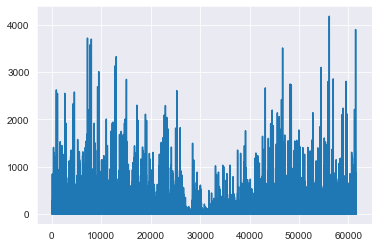

In [540]:
data.arr_del15.plot();

So, it looks like, its having delay times in minutes (its might be having a value of zero, when the delay is lesser than 15 minutes). 
So, let's rename the column accordingly.

In [541]:
#Renaming arr_del15 column
data.rename(columns = {'arr_del15':'arrival_delay_in_min'}, inplace = True)
data.columns

Index(['year', 'month', 'carrier_name', 'arrival_flight_count',
       'arrival_delay_in_min', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'airport_name', 'city_name',
       'state_name'],
      dtype='object')

In [542]:
#Renaming few other columns containing _ct in their names
data.rename(columns = {'carrier_ct':'air_carrier_related_delay_count'}, inplace = True)
data.rename(columns = {'weather_ct':'weather_related_delay_count'}, inplace = True)
data.rename(columns = {'nas_ct':'NAS_related_delay_count'}, inplace = True)
data.rename(columns = {'security_ct':'security_related_delay_count'}, inplace = True)
data.rename(columns = {'late_aircraft_ct':'late_aircraft_related_delay_count'}, inplace = True)
data.columns

Index(['year', 'month', 'carrier_name', 'arrival_flight_count',
       'arrival_delay_in_min', 'air_carrier_related_delay_count',
       'weather_related_delay_count', 'NAS_related_delay_count',
       'security_related_delay_count', 'late_aircraft_related_delay_count',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'airport_name', 'city_name', 'state_name'],
      dtype='object')

I have not converted these five to categorical due to the reason that, at a time more than one factor can be true and constitute to the overall delay.

In [543]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61304 entries, 0 to 61603
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               61304 non-null  int64  
 1   month                              61304 non-null  int64  
 2   carrier_name                       61304 non-null  object 
 3   arrival_flight_count               61304 non-null  float64
 4   arrival_delay_in_min               61304 non-null  float64
 5   air_carrier_related_delay_count    61304 non-null  float64
 6   weather_related_delay_count        61304 non-null  float64
 7   NAS_related_delay_count            61304 non-null  float64
 8   security_related_delay_count       61304 non-null  float64
 9   late_aircraft_related_delay_count  61304 non-null  float64
 10  arr_cancelled                      61304 non-null  float64
 11  arr_diverted                       61304 non-null  flo

Convert delay count columns to integers (from float)

In [544]:
data.arrival_delay_in_min.fillna(0, inplace=True)
data.air_carrier_related_delay_count.fillna(0, inplace=True)
data.weather_related_delay_count.fillna(0, inplace=True)
data.NAS_related_delay_count.fillna(0, inplace=True)
data.security_related_delay_count.fillna(0, inplace=True)
data.late_aircraft_related_delay_count.fillna(0, inplace=True)
data.arrival_delay_in_min = data.arrival_delay_in_min.astype(int)
data.air_carrier_related_delay_count = data.air_carrier_related_delay_count.astype(int)
data.weather_related_delay_count = data.weather_related_delay_count.astype(int)
data.NAS_related_delay_count = data.NAS_related_delay_count.astype(int)
data.security_related_delay_count = data.security_related_delay_count.astype(int)
data.late_aircraft_related_delay_count = data.late_aircraft_related_delay_count.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61304 entries, 0 to 61603
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               61304 non-null  int64  
 1   month                              61304 non-null  int64  
 2   carrier_name                       61304 non-null  object 
 3   arrival_flight_count               61304 non-null  float64
 4   arrival_delay_in_min               61304 non-null  int32  
 5   air_carrier_related_delay_count    61304 non-null  int32  
 6   weather_related_delay_count        61304 non-null  int32  
 7   NAS_related_delay_count            61304 non-null  int32  
 8   security_related_delay_count       61304 non-null  int32  
 9   late_aircraft_related_delay_count  61304 non-null  int32  
 10  arr_cancelled                      61304 non-null  float64
 11  arr_diverted                       61304 non-null  flo

In [545]:
data.arr_cancelled = data.arr_cancelled.astype(int)
data.arr_delay = data.arr_delay.astype(int)
data.arr_diverted = data.arr_diverted.astype(int)
data.carrier_delay = data.carrier_delay.astype(int)
data.nas_delay = data.nas_delay.astype(int)
data.security_delay = data.security_delay.astype(int)
data.weather_delay = data.weather_delay.astype(int)
data.late_aircraft_delay = data.late_aircraft_delay.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61304 entries, 0 to 61603
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               61304 non-null  int64  
 1   month                              61304 non-null  int64  
 2   carrier_name                       61304 non-null  object 
 3   arrival_flight_count               61304 non-null  float64
 4   arrival_delay_in_min               61304 non-null  int32  
 5   air_carrier_related_delay_count    61304 non-null  int32  
 6   weather_related_delay_count        61304 non-null  int32  
 7   NAS_related_delay_count            61304 non-null  int32  
 8   security_related_delay_count       61304 non-null  int32  
 9   late_aircraft_related_delay_count  61304 non-null  int32  
 10  arr_cancelled                      61304 non-null  int32  
 11  arr_diverted                       61304 non-null  int

In [546]:
data.arrival_flight_count= data.arrival_flight_count.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61304 entries, 0 to 61603
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   year                               61304 non-null  int64 
 1   month                              61304 non-null  int64 
 2   carrier_name                       61304 non-null  object
 3   arrival_flight_count               61304 non-null  int32 
 4   arrival_delay_in_min               61304 non-null  int32 
 5   air_carrier_related_delay_count    61304 non-null  int32 
 6   weather_related_delay_count        61304 non-null  int32 
 7   NAS_related_delay_count            61304 non-null  int32 
 8   security_related_delay_count       61304 non-null  int32 
 9   late_aircraft_related_delay_count  61304 non-null  int32 
 10  arr_cancelled                      61304 non-null  int32 
 11  arr_diverted                       61304 non-null  int32 
 12  arr_

renaming arr_cancelled, arr_diverted, arr_delay, carrier_delay,
weather_delay, nas_delay, security_delay, late_aircraft_delay columns,
deleting extra columns

In [547]:
data.rename(columns = {'arr_cancelled':'arrival_canceled_count'}, inplace = True)
data.rename(columns = {'arr_diverted':'arrival_diverted_count'}, inplace = True)
data.drop('arr_delay', axis=1, inplace=True) #already we have arrival_delay_in_min column
data.rename(columns = {'carrier_delay':'carrier_delay_in_min'}, inplace = True)
data.rename(columns = {'weather_delay':'weather_delay_in_min'}, inplace = True)
data.rename(columns = {'nas_delay':'nas_delay_in_min'}, inplace = True)
data.rename(columns = {'security_delay':'security_delay_in_min'}, inplace = True)
data.rename(columns = {'late_aircraft_delay':'late_aircraft_delay_in_min'}, inplace = True)
data.columns

Index(['year', 'month', 'carrier_name', 'arrival_flight_count',
       'arrival_delay_in_min', 'air_carrier_related_delay_count',
       'weather_related_delay_count', 'NAS_related_delay_count',
       'security_related_delay_count', 'late_aircraft_related_delay_count',
       'arrival_canceled_count', 'arrival_diverted_count',
       'carrier_delay_in_min', 'weather_delay_in_min', 'nas_delay_in_min',
       'security_delay_in_min', 'late_aircraft_delay_in_min', 'airport_name',
       'city_name', 'state_name'],
      dtype='object')

Structure of the Dataset:
The data frame contains flight delay information.
Initially it had the following columns: 'year', 'month', 'carrier',
    'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 
    'carrier_ct', ' weather_ct', 'nas_ct','security_ct', 'late_aircraft_ct',
    'arr_cancelled', 'arr_diverted',' arr_delay', ' carrier_delay',
    'weather_delay', 'nas_delay','security_delay', 'late_aircraft_delay'.

Later I performed some transformations, renaming and also added/dropped 
some columns. Finally, we have the following columns with us,
namely: 'year', 'month', 'carrier_name', 'arrival_flight_count',
    'arrival_delay_in_min', 'air_carrier_related_delay_count',
    'weather_related_delay_count', 'NAS_related_delay_count', 
    'security_related_delay_count', 'late_aircraft_related_delay_count',
    'arrival_canceled_count', 'arrival_diverted_count', 'carrier_delay_in_min',
    'weather_delay_in_min', 'nas_delay_in_min', 'security_delay_in_min',
    'late_aircraft_delay_in_min', 'airport_name', 'city_name',
    'state_name'.
    
In total, Now the total observations are: 61603

What is/are the main feature(s) of interest in the dataset?
I have deleted extra columns from the data frame.
And all the columns present now, would be of interest. 
Idea is, I would analyze delay data per city/state/airport wise
and would try to identify the reasons for the delay. 
Later I will also try to find out the recurrances and 
probable measures to eradicate the issues.

What features in the dataset do you think will help support your investigation
into your feature(s) of interest?

All the current features would support my investigation as I would look
forward the pattern of delay and try to identify the reasons and possible 
measurements for better flight experience by lowering the delay.

In [548]:
# let's observe certain distributions
data.arrival_flight_count.describe()

count    61304.000000
mean       321.076471
std        916.199059
min          1.000000
25%         38.000000
50%         88.000000
75%        214.000000
max      21931.000000
Name: arrival_flight_count, dtype: float64

In [549]:
data.airport_name.nunique()


376

In [550]:
data.carrier_name.nunique()

20

In [553]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61304 entries, 0 to 61603
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   year                               61304 non-null  int64 
 1   month                              61304 non-null  int64 
 2   carrier_name                       61304 non-null  object
 3   arrival_flight_count               61304 non-null  int32 
 4   arrival_delay_in_min               61304 non-null  int32 
 5   air_carrier_related_delay_count    61304 non-null  int32 
 6   weather_related_delay_count        61304 non-null  int32 
 7   NAS_related_delay_count            61304 non-null  int32 
 8   security_related_delay_count       61304 non-null  int32 
 9   late_aircraft_related_delay_count  61304 non-null  int32 
 10  arrival_canceled_count             61304 non-null  int32 
 11  arrival_diverted_count             61304 non-null  int32 
 12  carr

Even when I have 61603 observations, but predominantly it comes down to 20 
carriers and 376 airports in the USA.
Categorically, carrier would be preferred for investigation,
because of being lower in count.

In [555]:
import plotly.express as px
fig = px.imshow(data.corr())
fig.show()

Graph 1 - Number of flights operated by Carriers

''

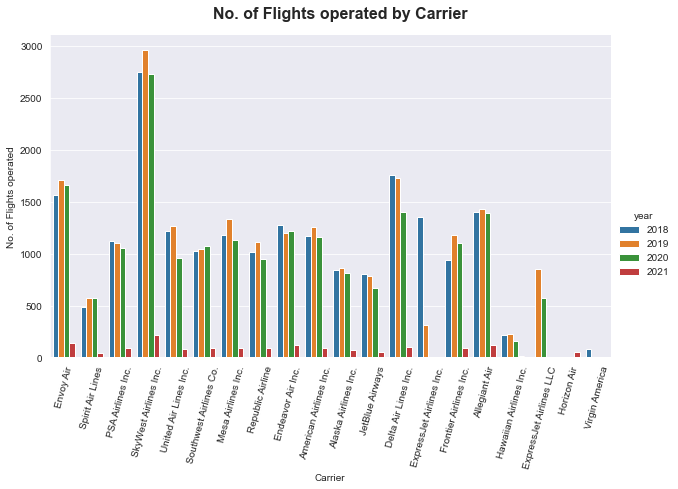

In [518]:
import seaborn as sb
no_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
graph = sb.catplot(data = data, x = 'carrier_name', kind = 'count',hue='year', aspect = 1.7);
graph.set_axis_labels('Carrier', 'No. of Flights operated'),
graph.fig.suptitle('No. of Flights operated by Carrier', y = 1.05, fontsize = 16, fontweight = 'bold');
graph.set_xticklabels(rotation=75);
''

Graph 1 - Observation
"SkyWest Airlines Inc" operated the most number of domestic flights in the USA,
followed by "Envoy Air" and "Delta Air Lines Inc". "American Airlines Inc",
"Allegiant Air"  aren't far behind either. 
"Hprizon Air" opearted the least number of flights in the USA. 
If we assume that the number of flights operated, is proportionate to the
popularity, then I would say, SkyWest is far ahead, in the race. 
Alternatively, SkyWest must be operating amongst biggest and populous 
airports in the USA.

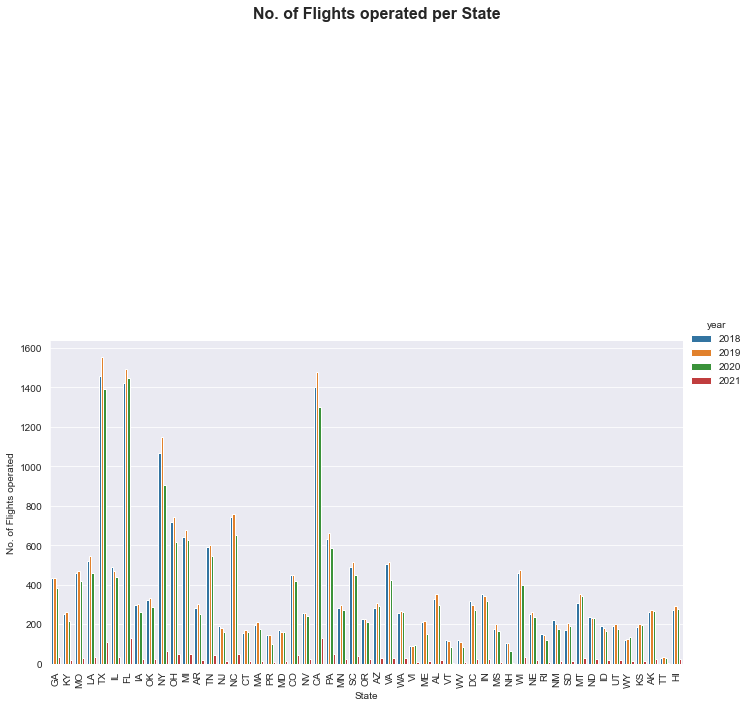

In [466]:
graph = sb.catplot(data = data, x = 'state_name', kind = 'count',hue='year', aspect = 1.9);
graph.set_axis_labels('State', 'No. of Flights operated'),
graph.fig.suptitle('No. of Flights operated per State', y = 1.9, fontsize = 16, fontweight = 'bold');
graph.set_xticklabels(rotation=90);

Graph 2 - Observation
States like Texas, New York, Florida and California operated the most 
number of flights. Each of the states are larger in size and are having 
a huge population base.

Graph 3 - Flight Arrival Delay Characteristics

In [467]:
data.arrival_delay_in_min.describe()

count    61304.000000
mean        52.343159
std        153.351399
min          0.000000
25%          5.000000
50%         13.000000
75%         35.000000
max       4176.000000
Name: arrival_delay_in_min, dtype: float64

In [468]:
data.carrier_delay_in_min.describe()

count     61304.000000
mean       1107.102897
std        3294.210099
min           0.000000
25%          69.000000
50%         270.000000
75%         835.000000
max      108068.000000
Name: carrier_delay_in_min, dtype: float64

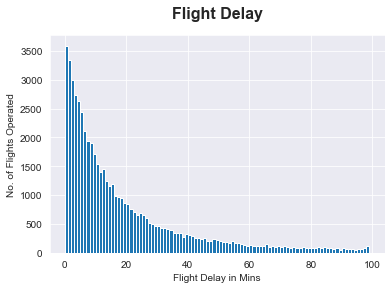

In [469]:
bin_edges = np.arange(0, 100, 1)
plt.hist(data = data, x = 'arrival_delay_in_min', bins = bin_edges);
plt.title("Flight Delay", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Flight Delay in Mins')
plt.ylabel('No. of Flights Operated');

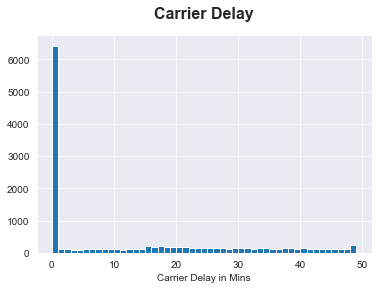

In [470]:
bin_edges = np.arange(0, 50, 1)
plt.hist(data = data, x = 'carrier_delay_in_min', bins = bin_edges);
plt.title("Carrier Delay", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Carrier Delay in Mins');

In [471]:
data.weather_delay_in_min.describe()


count    61304.000000
mean       201.034207
std        767.973313
min          0.000000
25%          0.000000
50%         11.000000
75%        125.000000
max      28294.000000
Name: weather_delay_in_min, dtype: float64

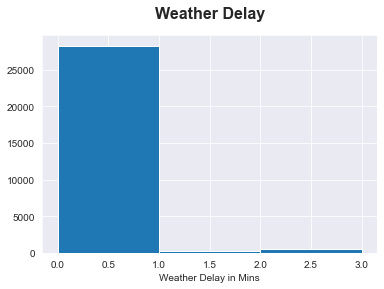

In [472]:
bin_edges = np.arange(0, 4, 1)
plt.hist(data = data, x = 'weather_delay_in_min', bins = bin_edges);
plt.title("Weather Delay", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weather Delay in Mins');

In [473]:
data.nas_delay_in_min.describe()


count     61304.000000
mean        831.019069
std        3474.130884
min           0.000000
25%          25.000000
50%         119.000000
75%         389.000000
max      112018.000000
Name: nas_delay_in_min, dtype: float64

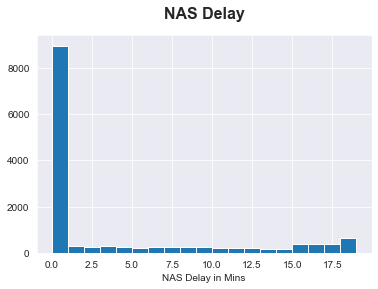

In [474]:
bin_edges = np.arange(0, 20, 1)
plt.hist(data = data, x = 'nas_delay_in_min', bins = bin_edges);
plt.title("NAS Delay", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('NAS Delay in Mins');


In [475]:
data.security_delay_in_min.describe()


count    61304.000000
mean         5.396141
std         35.038797
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3194.000000
Name: security_delay_in_min, dtype: float64

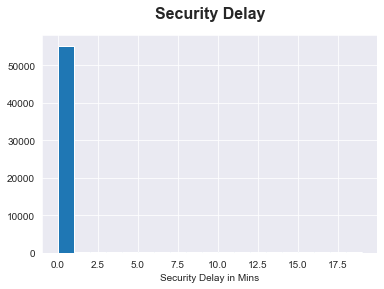

In [476]:
bin_edges = np.arange(0, 20, 1)
plt.hist(data = data, x = 'security_delay_in_min', bins = bin_edges);
plt.title("Security Delay", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Security Delay in Mins');

In [477]:
data.late_aircraft_delay_in_min.describe()


count     61304.000000
mean       1323.806505
std        4386.526257
min           0.000000
25%          32.000000
50%         237.000000
75%         854.000000
max      131666.000000
Name: late_aircraft_delay_in_min, dtype: float64

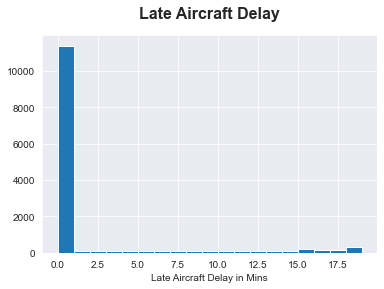

In [478]:
bin_edges = np.arange(0, 20, 1)
plt.hist(data = data, x = 'late_aircraft_delay_in_min', bins = bin_edges);
plt.title("Late Aircraft Delay", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Late Aircraft Delay in Mins');


Graph 3 - Observation
Most of the flight delays are less than approximately 13 minutes.
But average is dragged to 52, due to some unlikely huge values, in excess of 4000 +. 
Also 75 % of the data lies within the span of 35 minutes.

Carrier related delay is rather diversed. 
Most of the cases, there is zero delay.
Although 50 % of the cases lie within, say 4.5 hours (270 minutes). 
There could be potential flaws for such huge variation of data relating to
carrier related delay.

Weather related delay characteristics are similar to that of flight delays, 
as the 50 % of the data resides within 11 minutes. Average is dragged to 201,
because of high max value of 28294. In later part of the exploration, 
I would inspect, if cancellations are linked with such huge delay or not.
Cancellations and carrier related delays could potentially attribute to 
such huge weather related delays.

50 % of NAS (National Aviation System) delays are within 119 minutes.
Usaually the NAS delays might be relating to busier airports or during 
peak air-traffic conditions, or may be due to other airport-related 
operational issues.

In 75 % of the cases, security delay is zero minutes. 
During extremely unlikely security incidents/threats, the delays 
can be as max as close to 3200 minutes.

Mostly, the late aircraft delay is also, zero. 50 % of its data
reside within 237 minutes (4 hours).


Check the distribution(s) of your variable(s) of interest.
Were there any unusual points? 
Did you need to perform any transformations?

I analyzed various univariate distributions above. 
I identified major (domestic) airlines opearting in the US, during Year 2018,2019,2020 and Jan 2021.
Horizon Airlines operated the least number of flights, while major US airlines 
operated as expected.

On the other hand, bigger & populous states operated more number of flights
as expected. In terms of delay, I  can see some unusually huge data which
should be clear while I would do bi-variate and multi-variate analysis.

Various data type related transformations, along with various other methods 
of handling NaN values, were employed.Unnecessary columns were dropped,
while new columns were created, in order to suitably analyze the data frame.

Bivariate Exploration
In this section, investigate relationships between pairs of variables in your data.

In [479]:
data.columns


Index(['year', 'month', 'carrier_name', 'arrival_flight_count',
       'arrival_delay_in_min', 'air_carrier_related_delay_count',
       'weather_related_delay_count', 'NAS_related_delay_count',
       'security_related_delay_count', 'late_aircraft_related_delay_count',
       'arrival_canceled_count', 'arrival_diverted_count',
       'carrier_delay_in_min', 'weather_delay_in_min', 'nas_delay_in_min',
       'security_delay_in_min', 'late_aircraft_delay_in_min', 'airport_name',
       'city_name', 'state_name'],
      dtype='object')

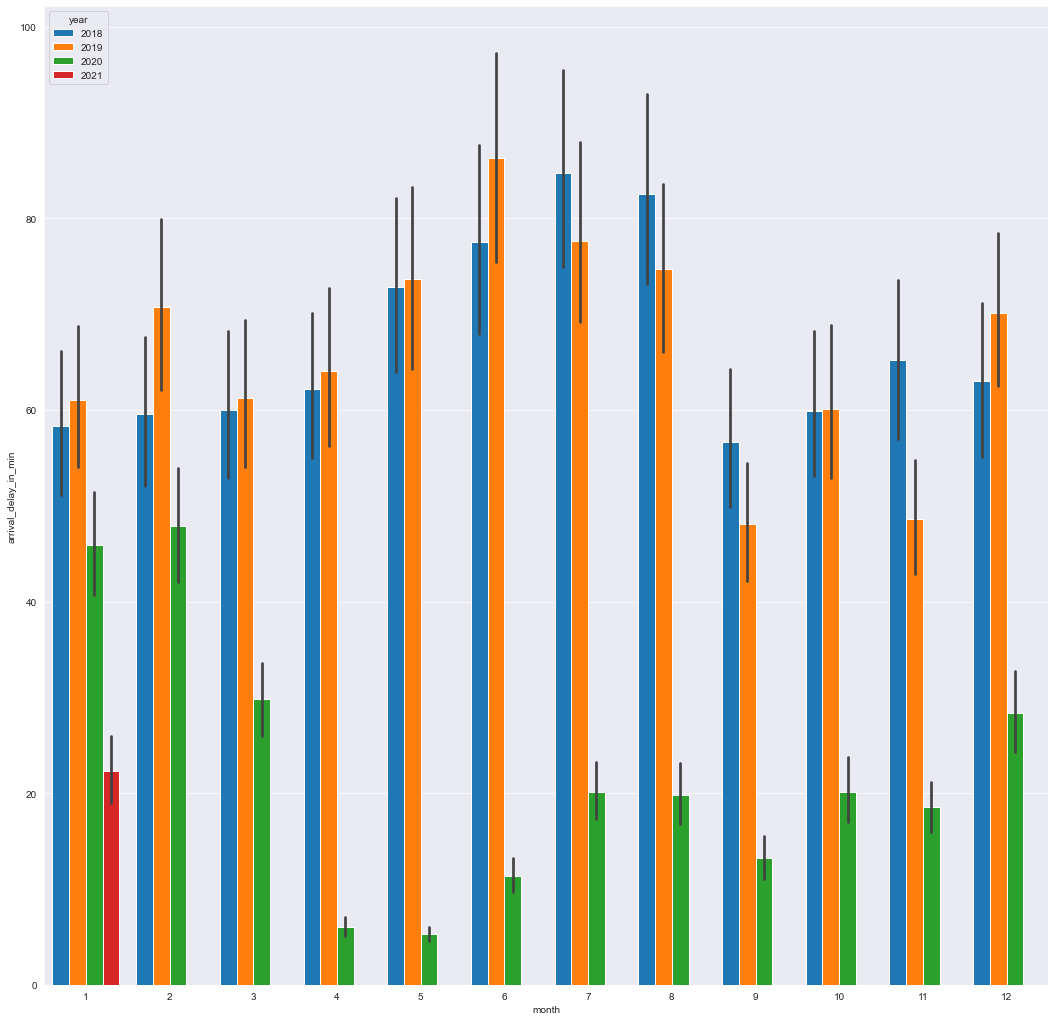

In [480]:
import seaborn as sns
plt.figure(figsize=(18,18))
sns.barplot(x=data['month'], y=data['arrival_delay_in_min'], hue=data['year'], data=data, saturation=1)
plt.show()

<AxesSubplot:xlabel='month', ylabel='carrier_delay_in_min'>

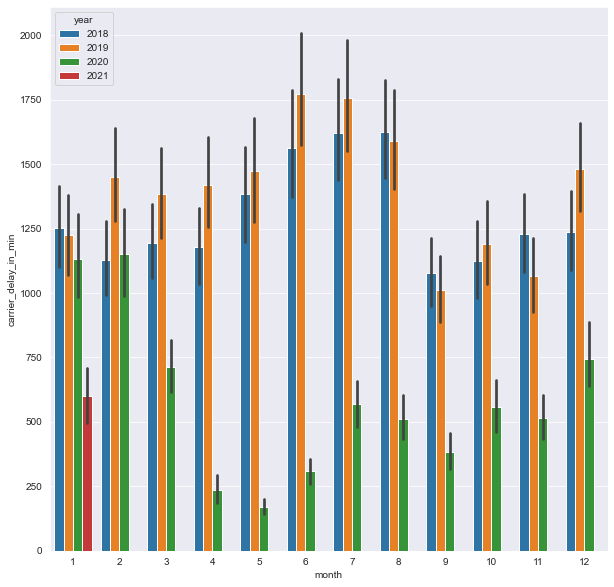

In [481]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(x=data['month'], y=data['carrier_delay_in_min'], hue=data['year'], data=data, saturation=0.8)

<AxesSubplot:xlabel='month', ylabel='security_delay_in_min'>

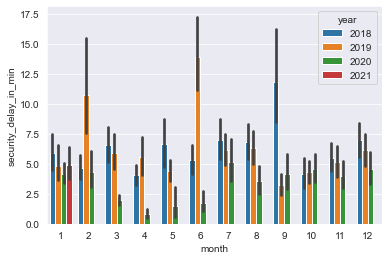

In [482]:
import seaborn as sns

sns.barplot(x=data['month'], y=data['security_delay_in_min'], hue=data['year'], data=data, saturation=0.8)

<AxesSubplot:xlabel='month', ylabel='nas_delay_in_min'>

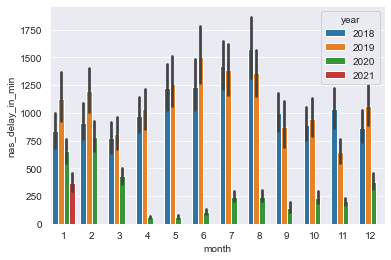

In [483]:
import seaborn as sns

sns.barplot(x=data['month'], y=data['nas_delay_in_min'], hue=data['year'], data=data, saturation=0.8)

<AxesSubplot:xlabel='month', ylabel='weather_delay_in_min'>

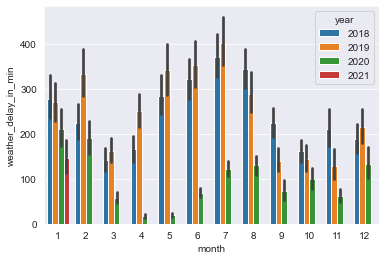

In [484]:
import seaborn as sns

sns.barplot(x=data['month'], y=data['weather_delay_in_min'], hue=data['year'], data=data, saturation=0.8)

<AxesSubplot:xlabel='month', ylabel='late_aircraft_delay_in_min'>

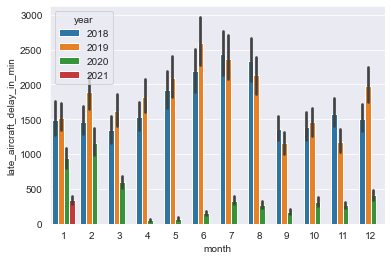

In [485]:
import seaborn as sns

sns.barplot(x=data['month'], y=data['late_aircraft_delay_in_min'], hue=data['year'], data=data, saturation=0.8)

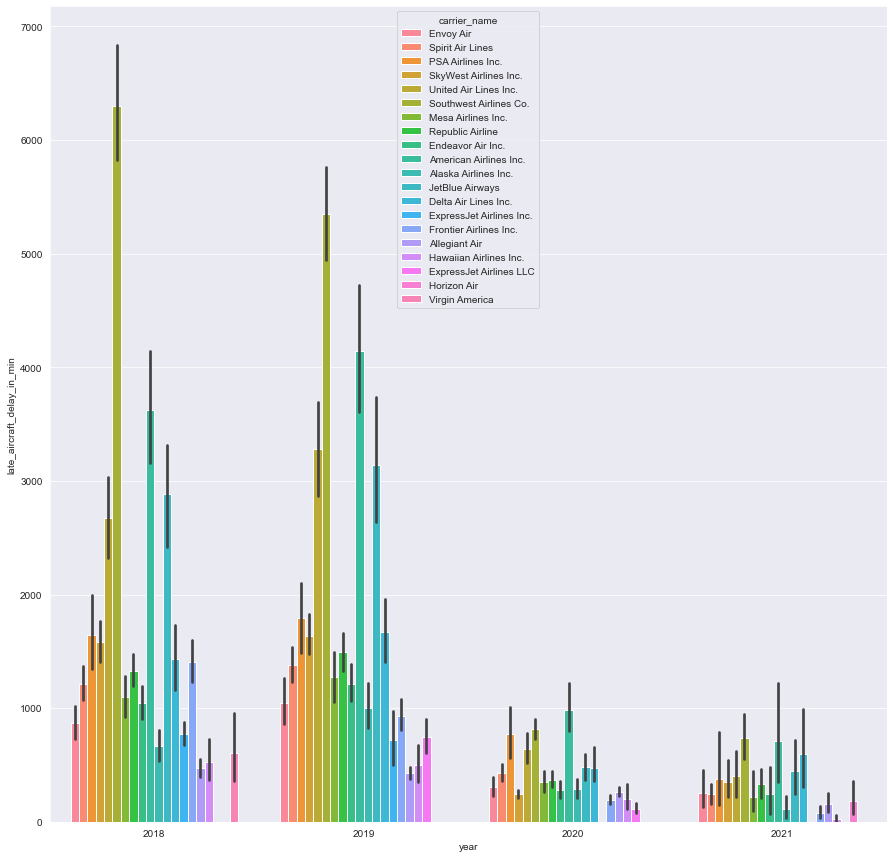

In [486]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.barplot(x=data['year'], y=data['late_aircraft_delay_in_min'], hue=data['carrier_name'], data=data, saturation=1)
plt.show()

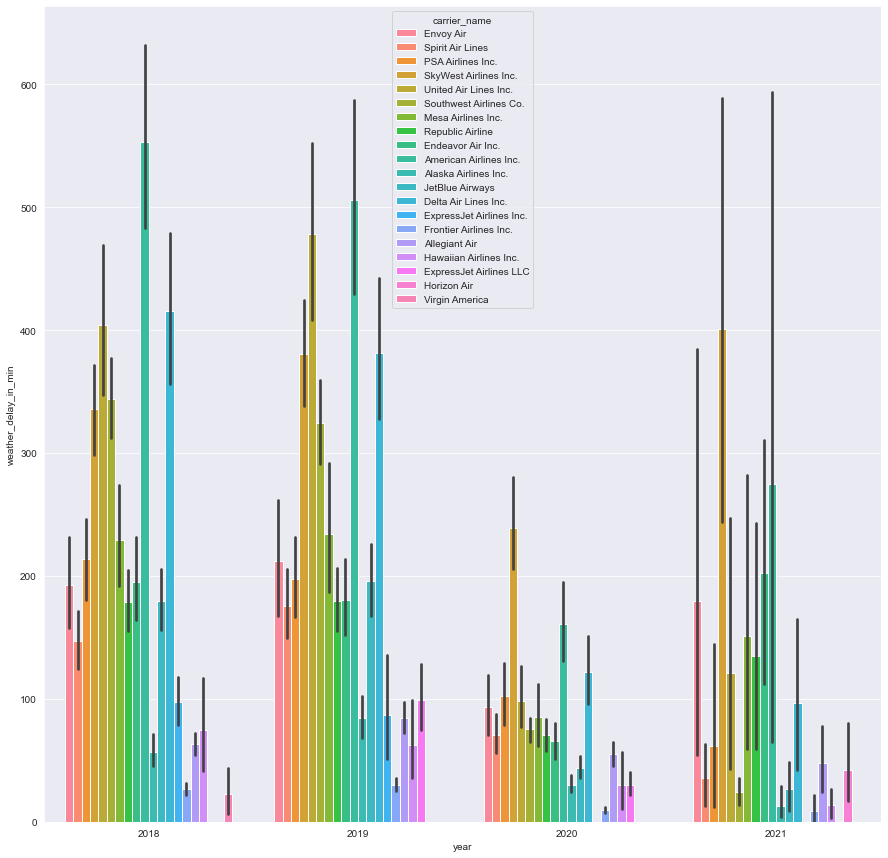

In [487]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.barplot(x=data['year'], y=data['weather_delay_in_min'], hue=data['carrier_name'], data=data, saturation=1)
plt.show()

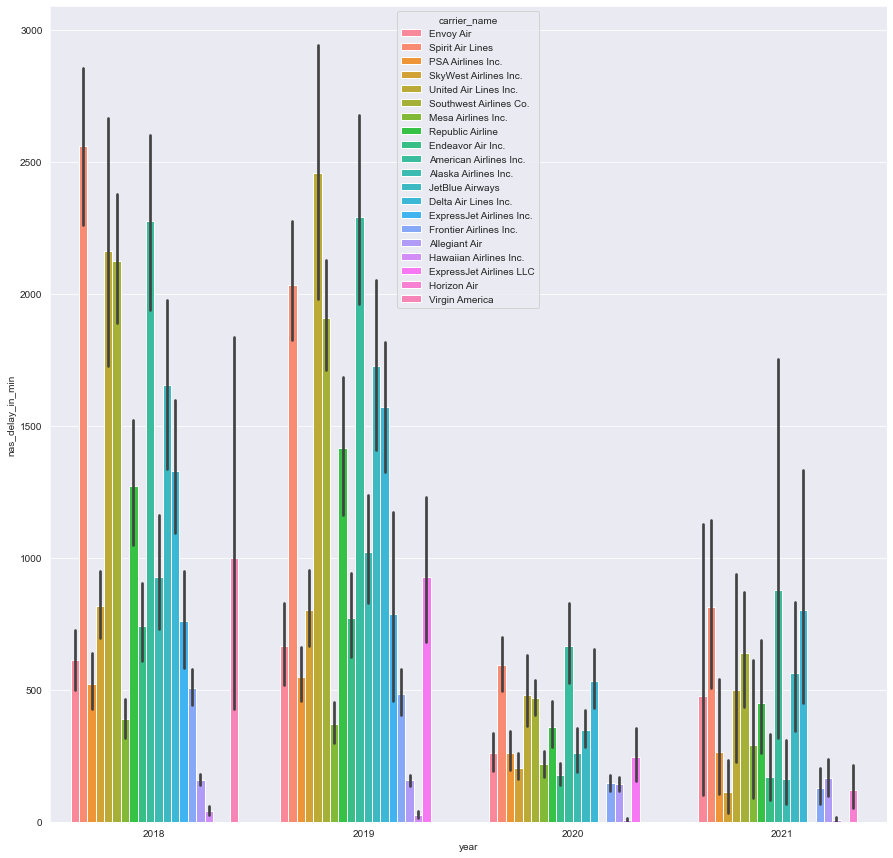

In [488]:

import seaborn as sns
plt.figure(figsize=(15,15))
sns.barplot(x=data['year'], y=data['nas_delay_in_min'], hue=data['carrier_name'], data=data, saturation=1)
plt.show()

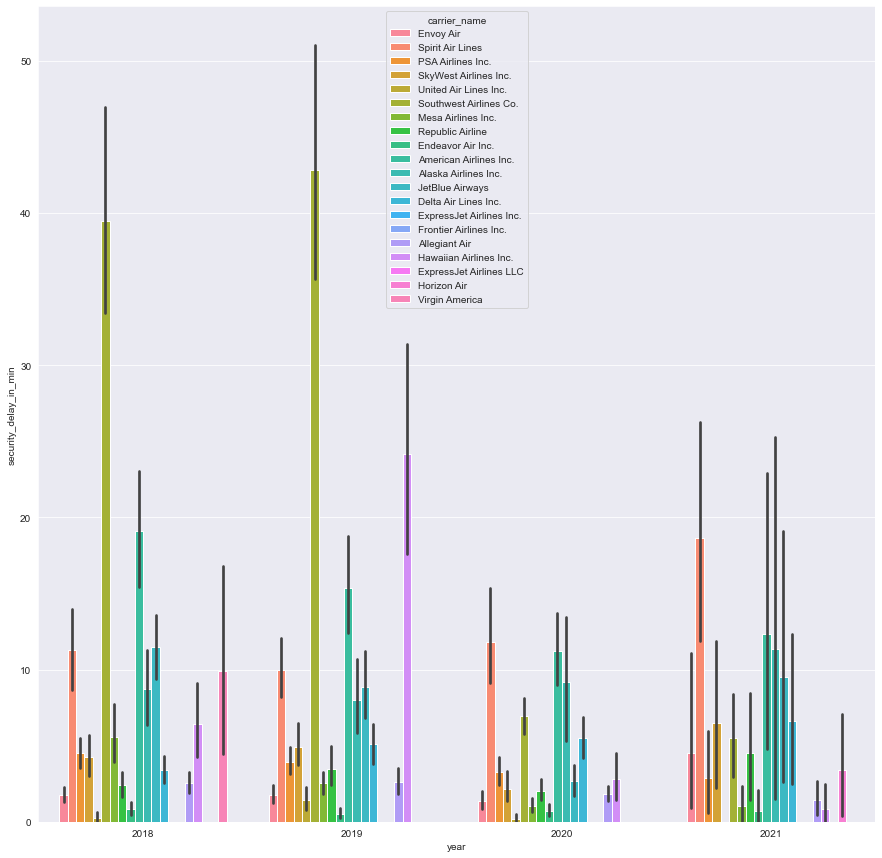

In [489]:


import seaborn as sns
plt.figure(figsize=(15,15))
sns.barplot(x=data['year'], y=data['security_delay_in_min'], hue=data['carrier_name'], data=data, saturation=1)
plt.show()

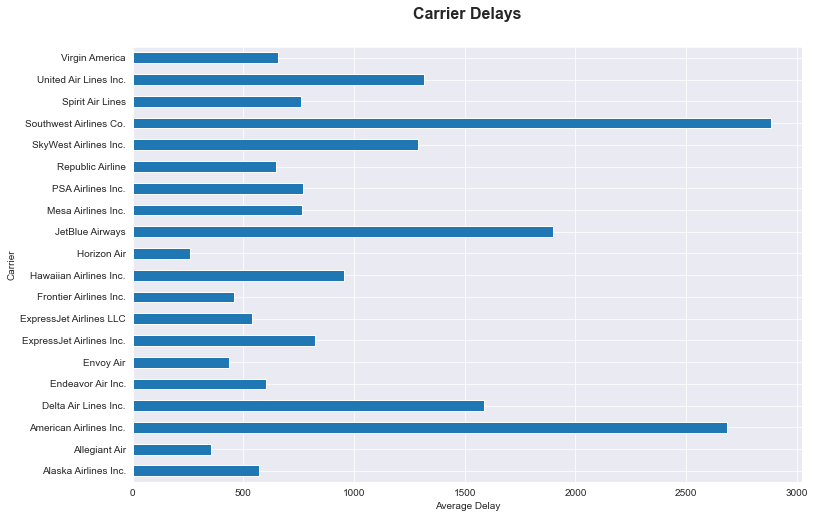

In [490]:
#carrier vs average delay
plt = data.groupby('carrier_name')['carrier_delay_in_min'].mean().plot(kind='barh', figsize=(12,8));
plt.set_title('Carrier Delays', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('Average Delay')
plt.set_ylabel('Carrier');


Graph 1 - Observation
On major airlines, Southwest delayed the most, followed by American Airlines,
JetBlue Airways and Delta Airlines. During earlier exploration, we saw that,
both american airlines, Delta Airlines and skywest operated in huge numbers. 
Southwest is also operated in huge numbers.
So, delay relating to southwest seems to be significant as well.

Graph 2 - Late Aircraft Delays per Carrier

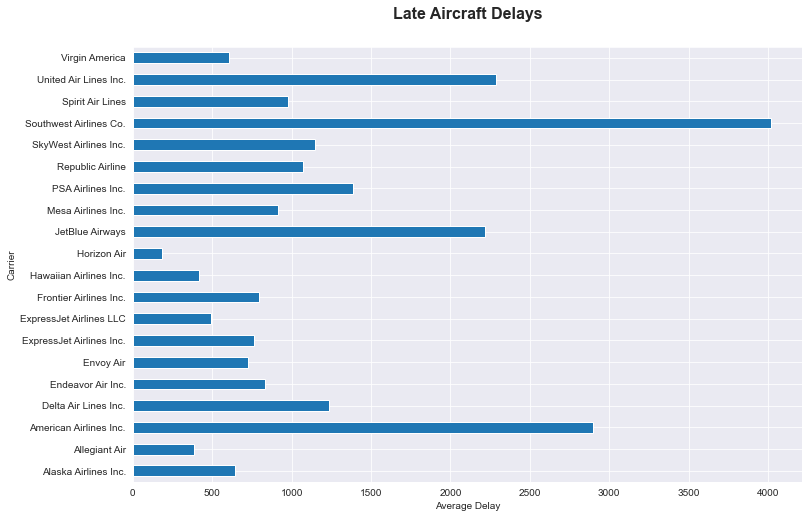

In [491]:
plt = data.groupby('carrier_name')['late_aircraft_delay_in_min'].mean().plot(kind='barh', figsize=(12,8));
plt.set_title('Late Aircraft Delays', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('Average Delay')
plt.set_ylabel('Carrier');

Graph 2 - Observation
Aircraft related delays are the most, for Southwest Airlines, Ameriacan Airlines, followed by 
United Air Lines & Jet Blue Airlines. 
Aircraft related delays are least for Horizon,Allegiant Air, For Horizon the number of flights operated
are also low. For Allegiant Air possibly either they have
a huge arsenal of aircrafts compared to the others, or they maintain 
those well enough, than others.

Graph 3 - Weather Delays per Carrier

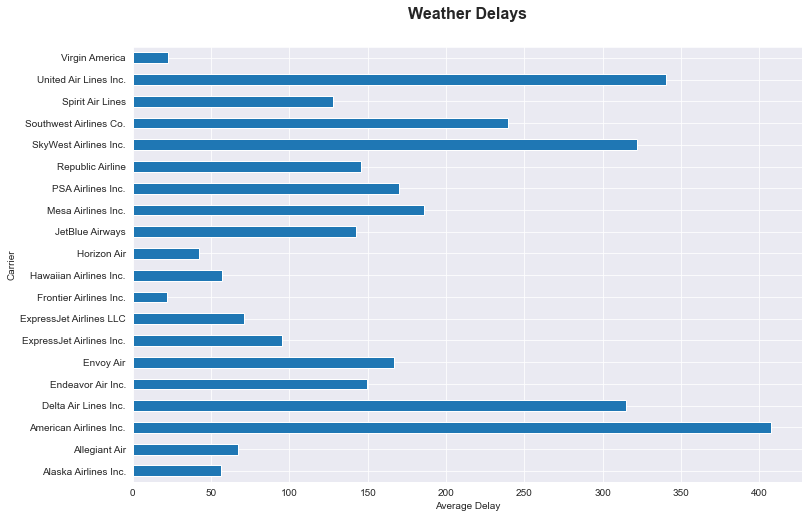

In [492]:
plt = data.groupby('carrier_name')['weather_delay_in_min'].mean().plot(kind='barh', figsize=(12,8));
plt.set_title('Weather Delays', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('Average Delay')
plt.set_ylabel('Carrier');

Graph 3 - Observation
American Airlines encounters the most weather related delay, followed by United Air Lines & Delta. While Frontier Airlines suffers the least, due to weather.

Graph 4 - Statewise Weather Delays

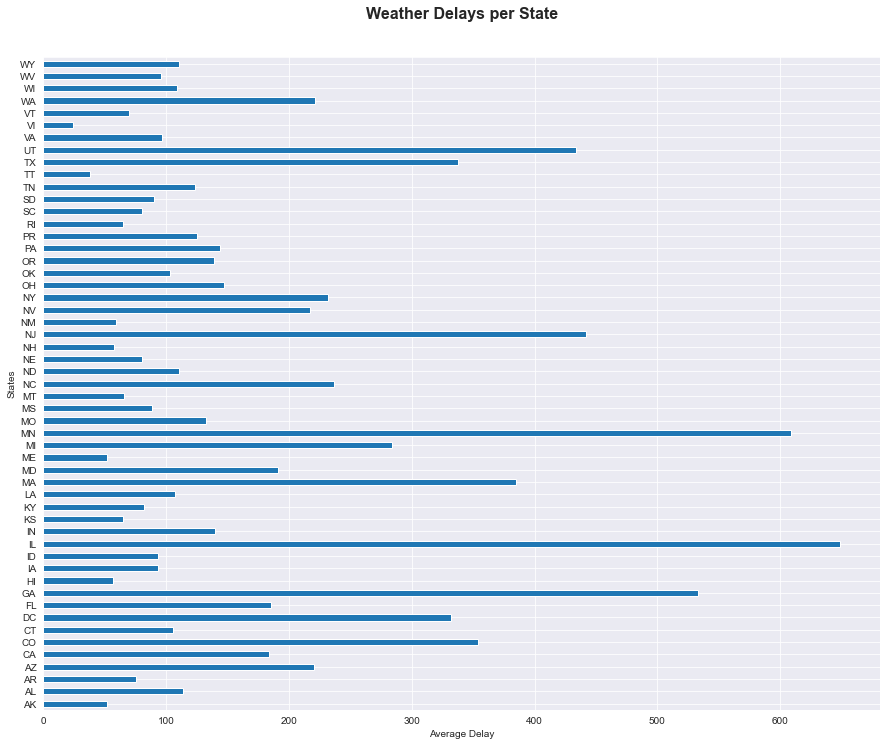

In [493]:
plt = data.groupby('state_name')['weather_delay_in_min'].mean().plot(kind='barh', figsize=(15,12));
plt.set_title('Weather Delays per State', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('Average Delay')
plt.set_ylabel('States');

Graph 4 - Observation
Weather delays are most for states like Illionois , Minnesota, Georgia,Utah, New Jersey and Illionois

In [494]:
# As we have enormous amount of data, let's select top airports, in terms of flights operated
np.unique(data.sort_values('arrival_flight_count',ascending=False)[['airport_name']].head(120))

array(['Charlotte Douglas International', 'Chicago Midway International',
       "Chicago O'Hare International", 'Dallas/Fort Worth International',
       'Hartsfield-Jackson Atlanta International'], dtype=object)

In [495]:
data.columns

Index(['year', 'month', 'carrier_name', 'arrival_flight_count',
       'arrival_delay_in_min', 'air_carrier_related_delay_count',
       'weather_related_delay_count', 'NAS_related_delay_count',
       'security_related_delay_count', 'late_aircraft_related_delay_count',
       'arrival_canceled_count', 'arrival_diverted_count',
       'carrier_delay_in_min', 'weather_delay_in_min', 'nas_delay_in_min',
       'security_delay_in_min', 'late_aircraft_delay_in_min', 'airport_name',
       'city_name', 'state_name'],
      dtype='object')

Multivariate Exploration

Graph 1 - Arrival Flight Count vs Arrival Delay, for all airlines

In [496]:
data.arrival_flight_count.describe()

count    61304.000000
mean       321.076471
std        916.199059
min          1.000000
25%         38.000000
50%         88.000000
75%        214.000000
max      21931.000000
Name: arrival_flight_count, dtype: float64

In [497]:
data.arrival_delay_in_min.describe()

count    61304.000000
mean        52.343159
std        153.351399
min          0.000000
25%          5.000000
50%         13.000000
75%         35.000000
max       4176.000000
Name: arrival_delay_in_min, dtype: float64

In [498]:
np.unique(data['carrier_name'])

array(['Alaska Airlines Inc.', 'Allegiant Air', 'American Airlines Inc.',
       'Delta Air Lines Inc.', 'Endeavor Air Inc.', 'Envoy Air',
       'ExpressJet Airlines Inc.', 'ExpressJet Airlines LLC',
       'Frontier Airlines Inc.', 'Hawaiian Airlines Inc.', 'Horizon Air',
       'JetBlue Airways', 'Mesa Airlines Inc.', 'PSA Airlines Inc.',
       'Republic Airline', 'SkyWest Airlines Inc.',
       'Southwest Airlines Co.', 'Spirit Air Lines',
       'United Air Lines Inc.', 'Virgin America'], dtype=object)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

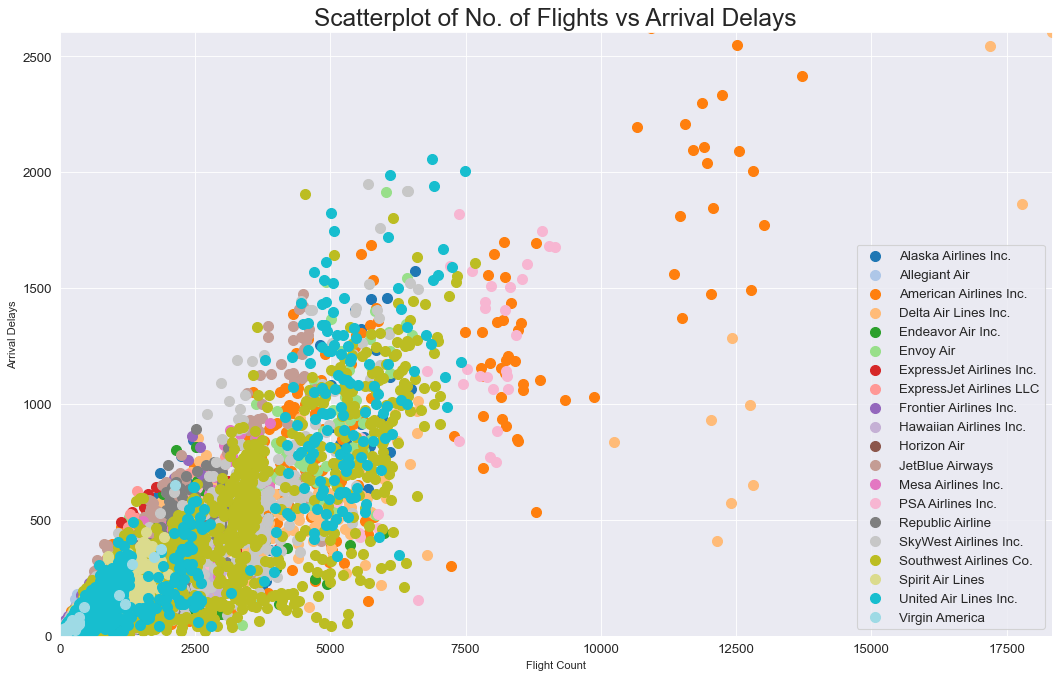

In [386]:
import matplotlib.cm
import matplotlib.pyplot as plt
%matplotlib inline
categories = np.unique(data['carrier_name'])
colors = [plt.cm.tab20(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'arrival_delay_in_min', 
                data=data.loc[data.carrier_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 2605),
              xlabel='Flight Count', ylabel='Arrival Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Arrival Delays", fontsize=22)
plt.legend(fontsize=12)    
plt.show() 



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

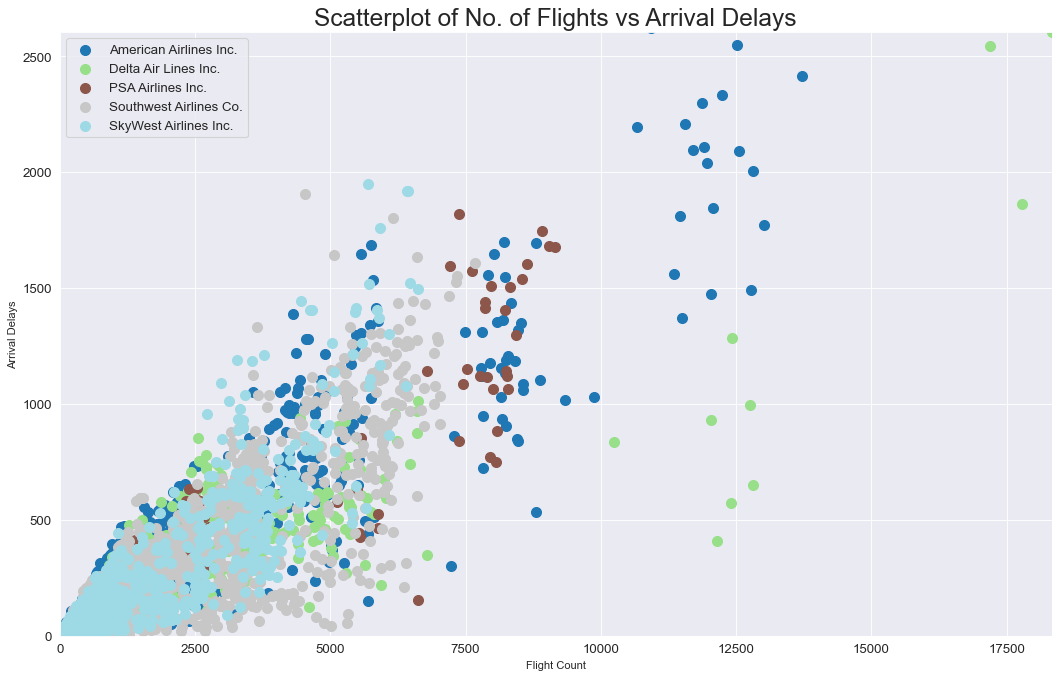

In [387]:
categories = [ 'American Airlines Inc.',
       'Delta Air Lines Inc.',  'PSA Airlines Inc.',
       'Southwest Airlines Co.','SkyWest Airlines Inc.']
colors = [plt.cm.tab20(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'arrival_delay_in_min', 
                data=data.loc[data.carrier_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 2605),
              xlabel='Flight Count', ylabel='Arrival Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Arrival Delays", fontsize=22)
plt.legend(fontsize=12)    
plt.show() 



Graph 1 - Observation
Mostly, positive co-relation is seen between number of flights and 
airline operates and amount of flight delays it causes. 
In certain cases, American airlines amd Delta Airlines have caused huge delays 
owing to enormous number of flights operated. However, its clearly indicated that, 
under quite high flight counts, skywest and southwest were able to keep
the arrival delays at minimum.

I cannot plot this graph in statewise (categorical) manner due to the 
fact that, states are huge in numbers and it would be difficult to plot
as categories.

At the second scatter, I only plotted data, on the basis of the said
five airlines, in order to have clear distinctive colors to differentiate

Graph 2 - Arrival Flight Count vs Carrier Related Delay, for all airlines

In [388]:
data.carrier_delay_in_min.describe()

count     61304.000000
mean       1107.102897
std        3294.210099
min           0.000000
25%          69.000000
50%         270.000000
75%         835.000000
max      108068.000000
Name: carrier_delay_in_min, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

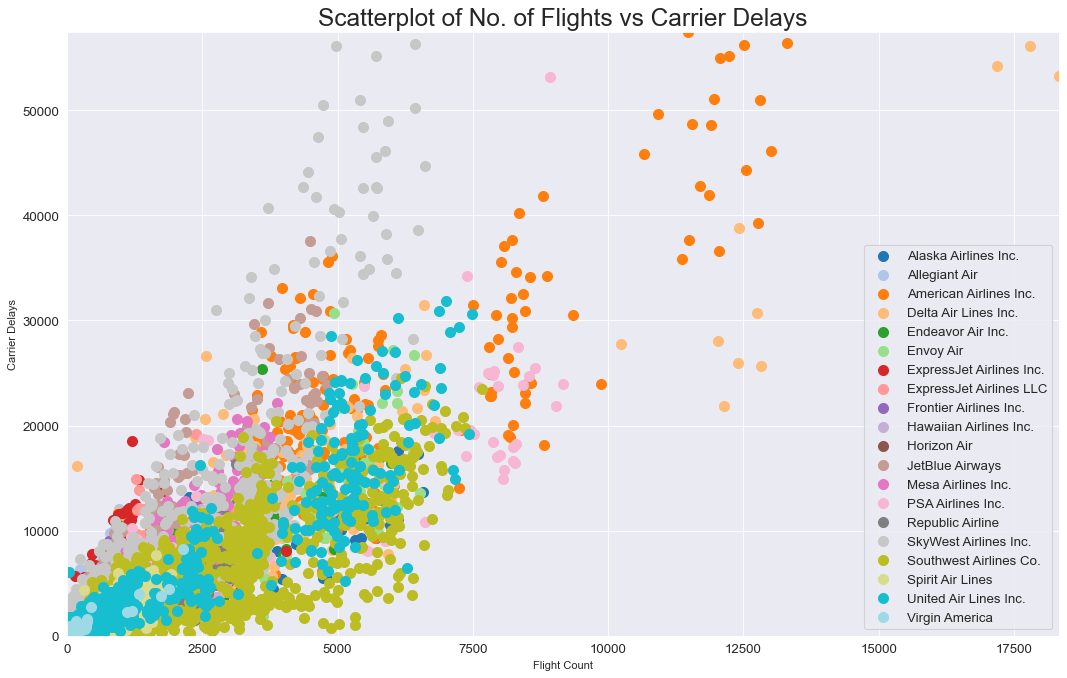

In [389]:
categories = np.unique(data['carrier_name'])
colors = [plt.cm.tab20(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'carrier_delay_in_min', 
                data=data.loc[data.carrier_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 57477),
              xlabel='Flight Count', ylabel='Carrier Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Carrier Delays", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

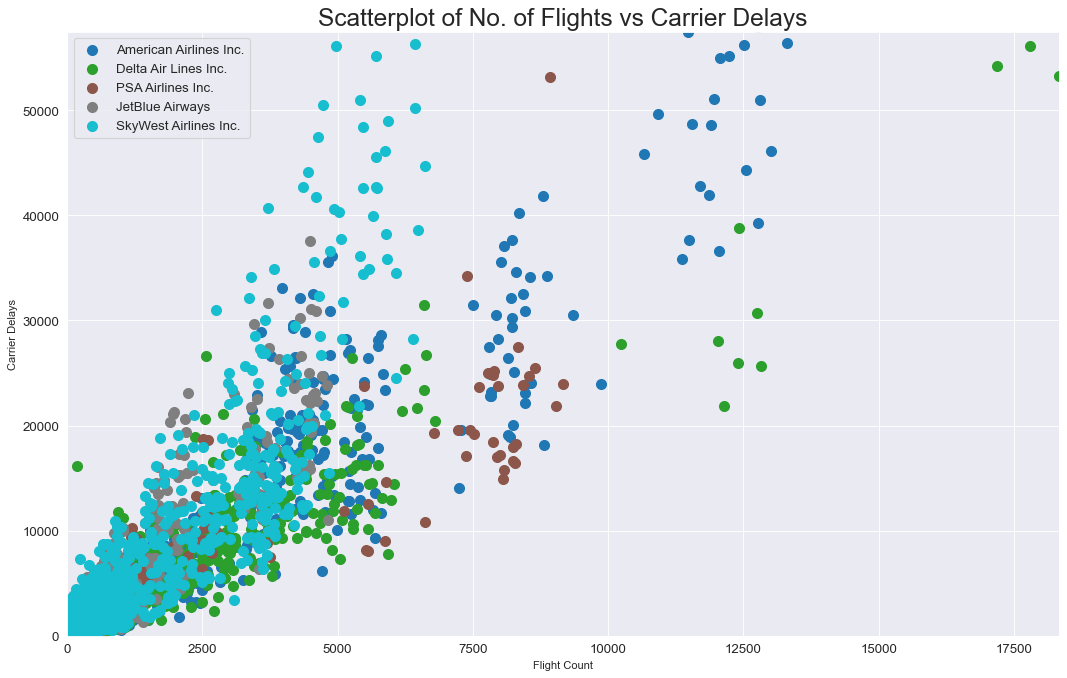

In [390]:
categories = [ 'American Airlines Inc.',
       'Delta Air Lines Inc.',  'PSA Airlines Inc.',
       'JetBlue Airways','SkyWest Airlines Inc.']
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'carrier_delay_in_min', 
                data=data.loc[data.carrier_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 57477),
              xlabel='Flight Count', ylabel='Carrier Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Carrier Delays", fontsize=22)
plt.legend(fontsize=12)    
plt.show()


Graph 2 - Observation
While I plotted the number of flights operated vs the carrier related delays,
a not so positive corelation found. Later we narrowed down our 
plotting by selecting the key operators, as per the first graph.
JetBlue Airways is clearly minimized the carrier related delays, 
while American Airlines, Delta Airlined, PSA delays are quite, all over the place.

In [504]:
data.arrival_flight_count.sort_values

<bound method Series.sort_values of 0         65
1         61
2        428
3        174
4        135
        ... 
61599    131
61600    141
61601    873
61602     31
61603     81
Name: arrival_flight_count, Length: 61304, dtype: int32>

In [507]:
# As we have enormous amount of data, let's select top airlines, in terms of flights operated
(data.sort_values('arrival_flight_count', ascending=False)[['carrier_name']].head(150))

carrier_name
56944    Delta Air Lines Inc.
48447    Delta Air Lines Inc.
46694    Delta Air Lines Inc.
13025    Delta Air Lines Inc.
54490    Delta Air Lines Inc.
...                       ...
1782        PSA Airlines Inc.
16753   United Air Lines Inc.
46096  Southwest Airlines Co.
5675   Southwest Airlines Co.
58543  Southwest Airlines Co.

[150 rows x 1 columns]

In [392]:
# As we have enormous amount of data, let's select top airports, in terms of flights operated
np.unique(data.sort_values('arrival_flight_count', ascending=False)[['airport_name']].head(120))

array(['Charlotte Douglas International', 'Chicago Midway International',
       "Chicago O'Hare International", 'Dallas/Fort Worth International',
       'Hartsfield-Jackson Atlanta International'], dtype=object)

Graph 3 - Airport wise Flight Count vs Delay

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

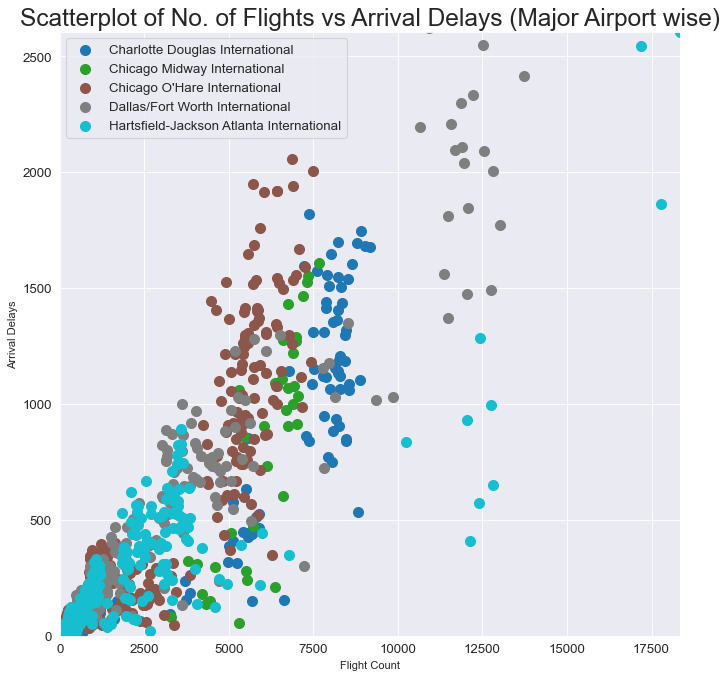

In [393]:
categories =['Charlotte Douglas International', 'Chicago Midway International',
       "Chicago O'Hare International", 'Dallas/Fort Worth International',
       'Hartsfield-Jackson Atlanta International']
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'arrival_delay_in_min', 
                data=data.loc[data.airport_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 2605),
              xlabel='Flight Count', ylabel='Arrival Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Arrival Delays (Major Airport wise)", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

Graph 3 - Observation
It is seen that when the flight count is less the airports are having less arrival delays compared. If the flight count tends to be higher for Dallas abd Hartsfield then the arrival delay also increases

As per earlier graph, we can see, while operating moderate to high
number of flights, two airports, namely 'Dallas/Fort Worth International',
'Hartsfield-Jackson Atlanta International' caused noticeablearrival delays.
I would inspect those now.

In [394]:
data[data['airport_name'] == "Dallas/Fort Worth International"].describe()


year       month  arrival_flight_count  arrival_delay_in_min  \
count   477.000000  477.000000            477.000000            477.000000   
mean   2019.046122    6.343816           1738.324948            308.253669   
std       0.868430    3.548468           3099.839531            580.862688   
min    2018.000000    1.000000              1.000000              0.000000   
25%    2018.000000    3.000000            101.000000             16.000000   
50%    2019.000000    6.000000            451.000000             74.000000   
75%    2020.000000    9.000000           1554.000000            272.000000   
max    2021.000000   12.000000          13987.000000           3714.000000   

       air_carrier_related_delay_count  weather_related_delay_count  \
count                       477.000000                   477.000000   
mean                         71.767296                    13.593291   
std                         136.229240                    26.760653   
min                           0.000000                     0.000000   
25%                           4.000000                     0.000000   
50%                          17.000000                     1.000000   
75%                          75.000000                    12.000000   
max                         885.000000                   175.000000   

       NAS_related_delay_count  security_related_delay_count  \
count               477.000000                    477.000000   
mean                110.878407                      0.624738   
std                 212.922220                      1.483684   
min                   0.000000                      0.000000   
25%                   6.000000                      0.000000   
50%                  25.000000                      0.000000   
75%                  97.000000                      1.000000   
max                1317.000000                     13.000000   

       late_aircraft_related_delay_count  arrival_canceled_count  \
count                         477.000000              477.000000   
mean                          109.628931               55.232704   
std                           222.943201              211.120745   
min                             0.000000                0.000000   
25%                             3.000000                0.000000   
50%                            16.000000                3.000000   
75%                            87.000000               27.000000   
max                          1429.000000             2945.000000   

       arrival_diverted_count  carrier_delay_in_min  weather_delay_in_min  \
count              477.000000            477.000000            477.000000   
mean                 6.742138           6831.511530           1585.675052   
std                 15.153783          13045.913141           3204.105518   
min                  0.000000              0.000000              0.000000   
25%                  0.000000            271.000000              0.000000   
50%                  2.000000           1147.000000            130.000000   
75%                  6.000000           8768.000000           1313.000000   
max                124.000000          83637.000000          23749.000000   

       nas_delay_in_min  security_delay_in_min  late_aircraft_delay_in_min  
count        477.000000             477.000000                  477.000000  
mean        5460.645702              30.727463                 8613.637317  
std        10984.508176              72.145316                17420.921619  
min            0.000000               0.000000                    0.000000  
25%          292.000000               0.000000                  173.000000  
50%         1230.000000               0.000000                 1291.000000  
75%         5352.000000              22.000000                 8044.000000  
max        97283.000000             539.000000               125086.000000

In [395]:
data[data['airport_name'] == "Hartsfield-Jackson Atlanta International"].describe()

year       month  arrival_flight_count  arrival_delay_in_min  \
count   537.000000  537.000000            537.000000            537.000000   
mean   2019.029795    6.312849           1978.973929            255.986965   
std       0.865512    3.515807           4559.816574            573.624537   
min    2018.000000    1.000000              1.000000              0.000000   
25%    2018.000000    3.000000            111.000000             14.000000   
50%    2019.000000    6.000000            345.000000             65.000000   
75%    2020.000000    9.000000           1581.000000            222.000000   
max    2021.000000   12.000000          21931.000000           4176.000000   

       air_carrier_related_delay_count  weather_related_delay_count  \
count                       537.000000                   537.000000   
mean                         67.815642                    10.148976   
std                         144.163016                    26.000218   
min                           0.000000                     0.000000   
25%                           5.000000                     0.000000   
50%                          20.000000                     1.000000   
75%                          62.000000                     6.000000   
max                        1026.000000                   188.000000   

       NAS_related_delay_count  security_related_delay_count  \
count               537.000000                    537.000000   
mean                 87.150838                      0.318436   
std                 216.138045                      0.806396   
min                   0.000000                      0.000000   
25%                   4.000000                      0.000000   
50%                  20.000000                      0.000000   
75%                  73.000000                      0.000000   
max                1884.000000                      7.000000   

       late_aircraft_related_delay_count  arrival_canceled_count  \
count                         537.000000              537.000000   
mean                           88.877095               31.925512   
std                           199.098200              238.098770   
min                             0.000000                0.000000   
25%                             3.000000                0.000000   
50%                            18.000000                3.000000   
75%                            64.000000               13.000000   
max                          1443.000000             4951.000000   

       arrival_diverted_count  carrier_delay_in_min  weather_delay_in_min  \
count              537.000000            537.000000            537.000000   
mean                 3.709497           6092.484171           1132.994413   
std                 12.354427          13839.539599           2905.745172   
min                  0.000000              0.000000              0.000000   
25%                  0.000000            290.000000              0.000000   
50%                  0.000000           1283.000000            114.000000   
75%                  2.000000           5479.000000            591.000000   
max                143.000000         108068.000000          28294.000000   

       nas_delay_in_min  security_delay_in_min  late_aircraft_delay_in_min  
count        537.000000             537.000000                  537.000000  
mean        4008.582868              21.757914                 6375.653631  
std        10829.538215              58.051035                14873.911644  
min            0.000000               0.000000                    0.000000  
25%          178.000000               0.000000                  191.000000  
50%          852.000000               0.000000                 1317.000000  
75%         3147.000000               8.000000                 4702.000000  
max       112018.000000             415.000000               131666.000000

Graph 4 - Major Flights & States, in terms of frequency

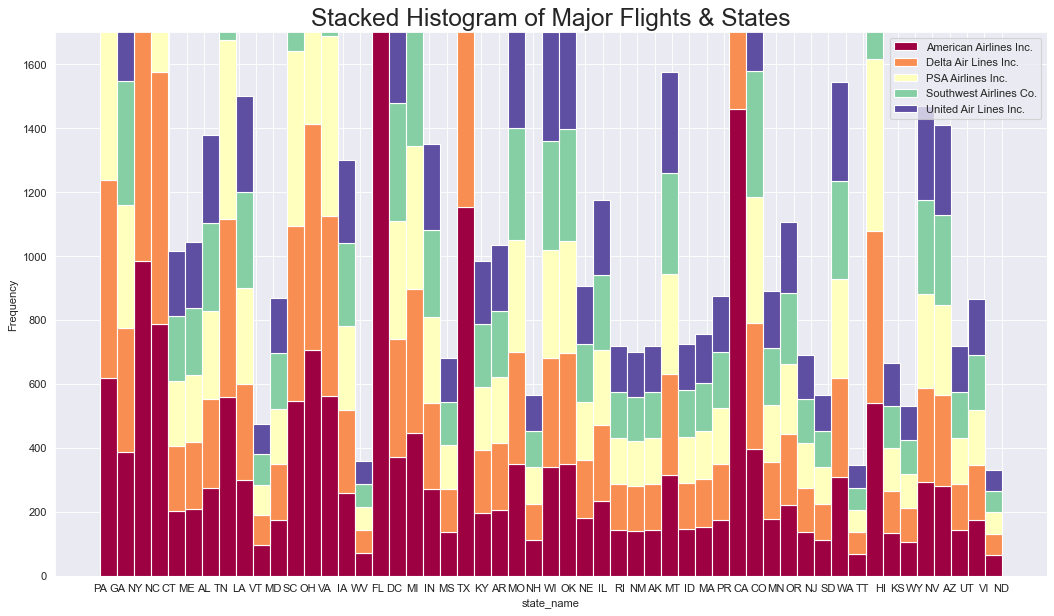

In [396]:
df_flights_filtered = data[data['carrier_name'].isin(['American Airlines Inc.', 'Delta Air Lines Inc.',
       'PSA Airlines Inc.', 'Southwest Airlines Co.',
       'United Air Lines Inc.'])]

x_var = 'state_name'
groupby_var = 'carrier_name'
df_agg = df_flights_filtered.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df_flights_filtered[x_var].values.tolist() for i, df in df_agg]


plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df_flights_filtered[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(df_flights_filtered[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of Major Flights & States", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 1700)
#plt.xticks(labels=np.unique(df_flights_filtered[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

# ref - https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

In [397]:
# As we have enormous amount of data, let's select top airlines, in terms of flights operated
np.unique(data.sort_values('arrival_flight_count', ascending=False)[['state_name']].head(120))

array(['GA', 'IL', 'NC', 'TX'], dtype=object)

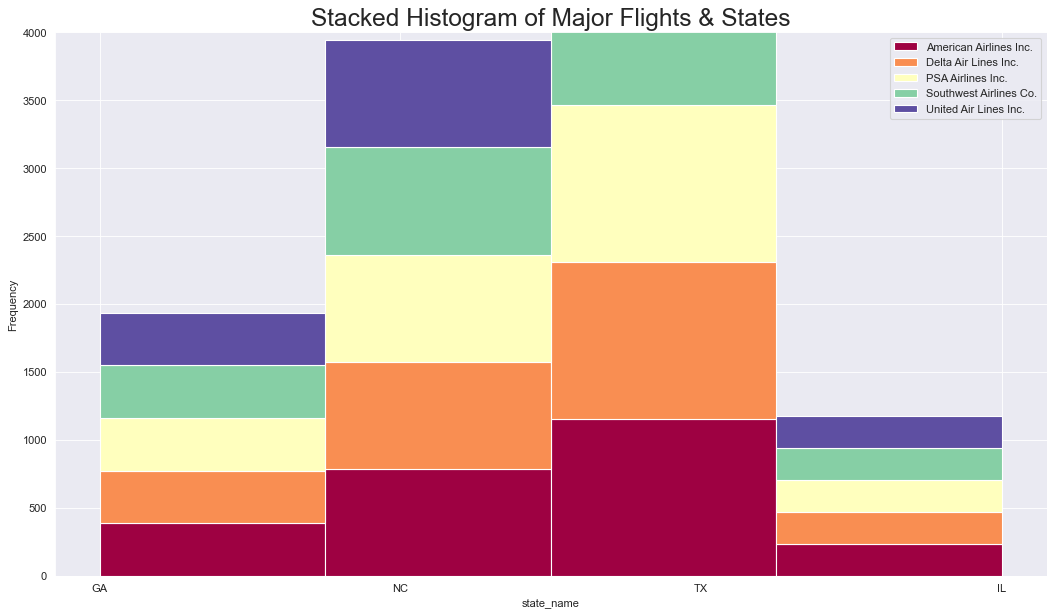

In [398]:
df_flights_filtered_interm = data[data['carrier_name'].isin(['American Airlines Inc.', 'Delta Air Lines Inc.',
       'PSA Airlines Inc.', 'Southwest Airlines Co.',
       'United Air Lines Inc.'])]

df_flights_filtered = df_flights_filtered_interm[df_flights_filtered_interm['state_name'].isin(['GA', 'IL', 'NC', 'TX'])]

x_var = 'state_name'
groupby_var = 'carrier_name'
df_agg = df_flights_filtered.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df_flights_filtered[x_var].values.tolist() for i, df in df_agg]


plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df_flights_filtered[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(df_flights_filtered[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of Major Flights & States", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 4000)
#plt.xticks(labels=np.unique(df_flights_filtered[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

Graph 4 - Observation
So, we can observe that Southwest airlines was having very less carrier delay 
compared to other airlines which are majorly flying in the top airports. 
PSA on the other hand was having carrier delays.


In [399]:
data.nas_delay_in_min.describe()


count     61304.000000
mean        831.019069
std        3474.130884
min           0.000000
25%          25.000000
50%         119.000000
75%         389.000000
max      112018.000000
Name: nas_delay_in_min, dtype: float64

Graph - 5 NAS Delay Characteristics <br>
Although this is a bi-variate representation, 
but adding it here, as part of studying not-so-common characteristics

<Figure size 10x10 with 0 Axes>

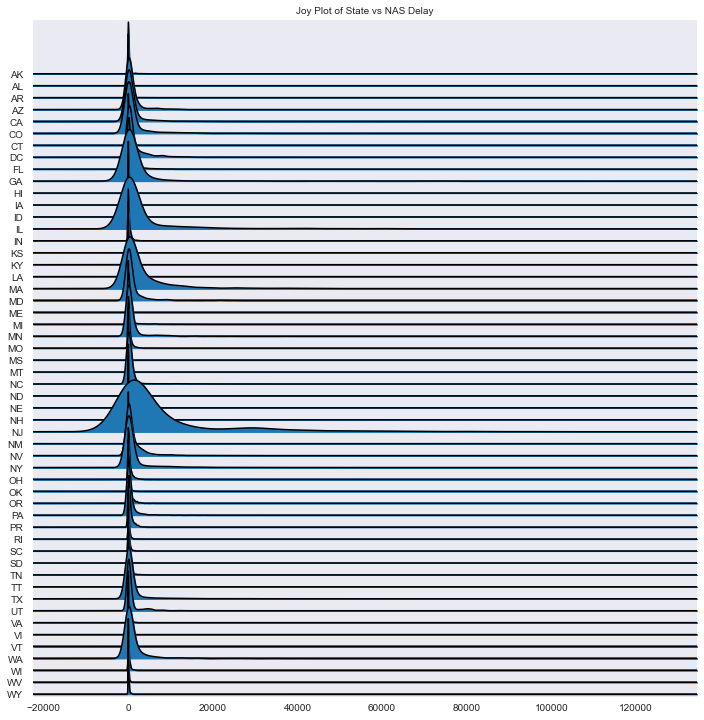

In [400]:
!pip install joypy
import joypy
plt.figure(figsize=(2,2), dpi= 5)
fig, axes = joypy.joyplot(data, column=['nas_delay_in_min'], 
                          by="state_name", ylim='own', figsize=(10,10))

# Decoration
plt.title('Joy Plot of State vs NAS Delay', fontsize=10)
plt.show();

Grpah 5 - Observation
States like New jersey, MA, IL and GA caused enormous NAS related delays

Applying Machine learning techniques on the data to see more useful insights

In [402]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61304 entries, 0 to 61603
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   year                               61304 non-null  int64 
 1   month                              61304 non-null  int64 
 2   carrier_name                       61304 non-null  object
 3   arrival_flight_count               61304 non-null  int32 
 4   arrival_delay_in_min               61304 non-null  int32 
 5   air_carrier_related_delay_count    61304 non-null  int32 
 6   weather_related_delay_count        61304 non-null  int32 
 7   NAS_related_delay_count            61304 non-null  int32 
 8   security_related_delay_count       61304 non-null  int32 
 9   late_aircraft_related_delay_count  61304 non-null  int32 
 10  arrival_canceled_count             61304 non-null  int32 
 11  arrival_diverted_count             61304 non-null  int32 
 12  carr

In [404]:
data_for_clustering=data.copy()

In [405]:
data

year  month          carrier_name  arrival_flight_count  \
0      2019      1             Envoy Air                    65   
1      2019      1             Envoy Air                    61   
2      2019      1             Envoy Air                   428   
3      2019      1             Envoy Air                   174   
4      2019      1             Envoy Air                   135   
...     ...    ...                   ...                   ...   
61599  2018     11  Delta Air Lines Inc.                   131   
61600  2018     11  Delta Air Lines Inc.                   141   
61601  2018     11  Delta Air Lines Inc.                   873   
61602  2018     11  Delta Air Lines Inc.                    31   
61603  2018     11  Delta Air Lines Inc.                    81   

       arrival_delay_in_min  air_carrier_related_delay_count  \
0                        15                                3   
1                        18                                2   
2                        80                               13   
3                        28                                5   
4                        23                               10   
...                     ...                              ...   
61599                    21                                7   
61600                    26                                7   
61601                   204                               62   
61602                     3                                2   
61603                    15                                3   

       weather_related_delay_count  NAS_related_delay_count  \
0                                0                        4   
1                                1                        8   
2                                5                       27   
3                                1                       11   
4                                0                        6   
...                            ...                      ...   
61599                            1                        5   
61600                            0                        5   
61601                           11                       74   
61602                            0                        0   
61603                            0                        3   

       security_related_delay_count  late_aircraft_related_delay_count  \
0                                 0                                  6   
1                                 0                                  5   
2                                 0                                 34   
3                                 0                                  9   
4                                 0                                  5   
...                             ...                                ...   
61599                             0                                  7   
61600                             0                                 11   
61601                             0                                 55   
61602                             0                                  0   
61603                             0                                  7   

       arrival_canceled_count  arrival_diverted_count  carrier_delay_in_min  \
0                           1                       1                   180   
1                           1                       0                   180   
2                          15                       0                   705   
3                           0                       0                   360   
4                           2                       0                   320   
...                       ...                     ...                   ...   
61599                       0                       0                   284   
61600                       0                       2                   193   
61601                       2                       1                  3249   
61602    

In [406]:
data_for_clustering

year  month          carrier_name  arrival_flight_count  \
0      2019      1             Envoy Air                    65   
1      2019      1             Envoy Air                    61   
2      2019      1             Envoy Air                   428   
3      2019      1             Envoy Air                   174   
4      2019      1             Envoy Air                   135   
...     ...    ...                   ...                   ...   
61599  2018     11  Delta Air Lines Inc.                   131   
61600  2018     11  Delta Air Lines Inc.                   141   
61601  2018     11  Delta Air Lines Inc.                   873   
61602  2018     11  Delta Air Lines Inc.                    31   
61603  2018     11  Delta Air Lines Inc.                    81   

       arrival_delay_in_min  air_carrier_related_delay_count  \
0                        15                                3   
1                        18                                2   
2                        80                               13   
3                        28                                5   
4                        23                               10   
...                     ...                              ...   
61599                    21                                7   
61600                    26                                7   
61601                   204                               62   
61602                     3                                2   
61603                    15                                3   

       weather_related_delay_count  NAS_related_delay_count  \
0                                0                        4   
1                                1                        8   
2                                5                       27   
3                                1                       11   
4                                0                        6   
...                            ...                      ...   
61599                            1                        5   
61600                            0                        5   
61601                           11                       74   
61602                            0                        0   
61603                            0                        3   

       security_related_delay_count  late_aircraft_related_delay_count  \
0                                 0                                  6   
1                                 0                                  5   
2                                 0                                 34   
3                                 0                                  9   
4                                 0                                  5   
...                             ...                                ...   
61599                             0                                  7   
61600                             0                                 11   
61601                             0                                 55   
61602                             0                                  0   
61603                             0                                  7   

       arrival_canceled_count  arrival_diverted_count  carrier_delay_in_min  \
0                           1                       1                   180   
1                           1                       0                   180   
2                          15                       0                   705   
3                           0                       0                   360   
4                           2                       0                   320   
...                       ...                     ...                   ...   
61599                       0                       0                   284   
61600                       0                       2                   193   
61601                       2                       1                  3249   
61602    

In [407]:
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()
data_for_clustering['airport_name'] = lb1.fit_transform(data_for_clustering['airport_name'])


year  month          carrier_name  arrival_flight_count  \
0      2019      1             Envoy Air                    65   
1      2019      1             Envoy Air                    61   
2      2019      1             Envoy Air                   428   
3      2019      1             Envoy Air                   174   
4      2019      1             Envoy Air                   135   
...     ...    ...                   ...                   ...   
61599  2018     11  Delta Air Lines Inc.                   131   
61600  2018     11  Delta Air Lines Inc.                   141   
61601  2018     11  Delta Air Lines Inc.                   873   
61602  2018     11  Delta Air Lines Inc.                    31   
61603  2018     11  Delta Air Lines Inc.                    81   

       arrival_delay_in_min  air_carrier_related_delay_count  \
0                        15                                3   
1                        18                                2   
2                        80                               13   
3                        28                                5   
4                        23                               10   
...                     ...                              ...   
61599                    21                                7   
61600                    26                                7   
61601                   204                               62   
61602                     3                                2   
61603                    15                                3   

       weather_related_delay_count  NAS_related_delay_count  \
0                                0                        4   
1                                1                        8   
2                                5                       27   
3                                1                       11   
4                                0                        6   
...                            ...                      ...   
61599                            1                        5   
61600                            0                        5   
61601                           11                       74   
61602                            0                        0   
61603                            0                        3   

       security_related_delay_count  late_aircraft_related_delay_count  \
0                                 0                                  6   
1                                 0                                  5   
2                                 0                                 34   
3                                 0                                  9   
4                                 0                                  5   
...                             ...                                ...   
61599                             0                                  7   
61600                             0                                 11   
61601                             0                                 55   
61602                             0                                  0   
61603                             0                                  7   

       arrival_canceled_count  arrival_diverted_count  carrier_delay_in_min  \
0                           1                       1                   180   
1                           1                       0                   180   
2                          15                       0                   705   
3                           0                       0                   360   
4                           2                       0                   320   
...                       ...                     ...                   ...   
61599                       0                       0                   284   
61600                       0                       2                   193   
61601                       2                       1                  3249   
61602    

In [408]:
lb2 = LabelEncoder()
data_for_clustering['carrier_name'] = lb2.fit_transform(data_for_clustering['carrier_name'])


In [409]:
lb3 = LabelEncoder()
data_for_clustering['state_name'] = lb3.fit_transform(data_for_clustering['state_name'])
data_for_clustering

year  month  carrier_name  arrival_flight_count  arrival_delay_in_min  \
0      2019      1             5                    65                    15   
1      2019      1             5                    61                    18   
2      2019      1             5                   428                    80   
3      2019      1             5                   174                    28   
4      2019      1             5                   135                    23   
...     ...    ...           ...                   ...                   ...   
61599  2018     11             3                   131                    21   
61600  2018     11             3                   141                    26   
61601  2018     11             3                   873                   204   
61602  2018     11             3                    31                     3   
61603  2018     11             3                    81                    15   

       air_carrier_related_delay_count  weather_related_delay_count  \
0                                    3                            0   
1                                    2                            1   
2                                   13                            5   
3                                    5                            1   
4                                   10                            0   
...                                ...                          ...   
61599                                7                            1   
61600                                7                            0   
61601                               62                           11   
61602                                2                            0   
61603                                3                            0   

       NAS_related_delay_count  security_related_delay_count  \
0                            4                             0   
1                            8                             0   
2                           27                             0   
3                           11                             0   
4                            6                             0   
...                        ...                           ...   
61599                        5                             0   
61600                        5                             0   
61601                       74                             0   
61602                        0                             0   
61603                        3                             0   

       late_aircraft_related_delay_count  arrival_canceled_count  \
0                                      6                       1   
1                                      5                       1   
2                                     34                      15   
3                                      9                       0   
4                                      5                       2   
...                                  ...                     ...   
61599                                  7                       0   
61600                                 11                       0   
61601                                 55                       2   
61602                                  0                       0   
61603                                  7                       0   

       arrival_diverted_count  carrier_delay_in_min  weather_delay_in_min  \
0                           1                   180                    29   
1                           0                   180                    36   
2                           0                   705                   213   
3                           0                   360                    55   
4                           0                   320                    27   
...                       ...                   ...                   ...   
61599                       0                   284                 

In [410]:
lb4 = LabelEncoder()
data_for_clustering['city_name'] = lb4.fit_transform(data_for_clustering['city_name'])
data_for_clustering

year  month  carrier_name  arrival_flight_count  arrival_delay_in_min  \
0      2019      1             5                    65                    15   
1      2019      1             5                    61                    18   
2      2019      1             5                   428                    80   
3      2019      1             5                   174                    28   
4      2019      1             5                   135                    23   
...     ...    ...           ...                   ...                   ...   
61599  2018     11             3                   131                    21   
61600  2018     11             3                   141                    26   
61601  2018     11             3                   873                   204   
61602  2018     11             3                    31                     3   
61603  2018     11             3                    81                    15   

       air_carrier_related_delay_count  weather_related_delay_count  \
0                                    3                            0   
1                                    2                            1   
2                                   13                            5   
3                                    5                            1   
4                                   10                            0   
...                                ...                          ...   
61599                                7                            1   
61600                                7                            0   
61601                               62                           11   
61602                                2                            0   
61603                                3                            0   

       NAS_related_delay_count  security_related_delay_count  \
0                            4                             0   
1                            8                             0   
2                           27                             0   
3                           11                             0   
4                            6                             0   
...                        ...                           ...   
61599                        5                             0   
61600                        5                             0   
61601                       74                             0   
61602                        0                             0   
61603                        3                             0   

       late_aircraft_related_delay_count  arrival_canceled_count  \
0                                      6                       1   
1                                      5                       1   
2                                     34                      15   
3                                      9                       0   
4                                      5                       2   
...                                  ...                     ...   
61599                                  7                       0   
61600                                 11                       0   
61601                                 55                       2   
61602                                  0                       0   
61603                                  7                       0   

       arrival_diverted_count  carrier_delay_in_min  weather_delay_in_min  \
0                           1                   180                    29   
1                           0                   180                    36   
2                           0                   705                   213   
3                           0                   360                    55   
4                           0                   320                    27   
...                       ...                   ...                   ...   
61599                       0                   284                 

In [412]:

#cluster formation of data using K-means
from sklearn.cluster import KMeans
store_grouped_clustering =data_for_clustering
sum_of_squared_distances = []
K = range(1,10)

for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(store_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)



1 2 3 4 5 6 7 8 9 

Text(0.5, 1.0, 'Elbow Method For Optimal k')

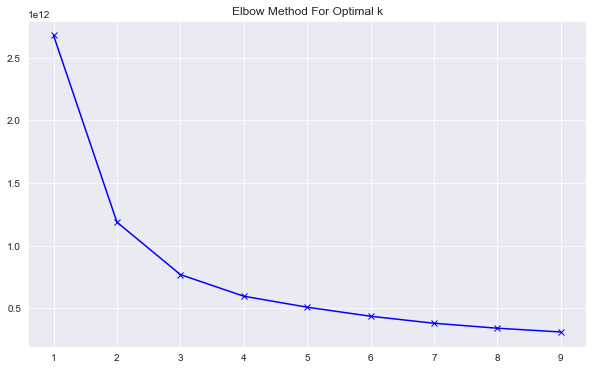

In [413]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.title('Elbow Method For Optimal k')

In [414]:

# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=100).fit(store_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:6]

In [415]:
kmeans.labels_


array([0, 0, 0, ..., 0, 0, 0])

In [93]:
data['labels']=kmeans.labels_


In [94]:
data

year  month  carrier_name  arrival_flight_count  arrival_delay_in_min  \
0      2019      1             5                    65                    15   
1      2019      1             5                    61                    18   
2      2019      1             5                   428                    80   
3      2019      1             5                   174                    28   
4      2019      1             5                   135                    23   
...     ...    ...           ...                   ...                   ...   
61599  2018     11             3                   131                    21   
61600  2018     11             3                   141                    26   
61601  2018     11             3                   873                   204   
61602  2018     11             3                    31                     3   
61603  2018     11             3                    81                    15   

       air_carrier_related_delay_count  weather_related_delay_count  \
0                                    3                            0   
1                                    2                            1   
2                                   13                            5   
3                                    5                            1   
4                                   10                            0   
...                                ...                          ...   
61599                                7                            1   
61600                                7                            0   
61601                               62                           11   
61602                                2                            0   
61603                                3                            0   

       NAS_related_delay_count  security_related_delay_count  \
0                            4                             0   
1                            8                             0   
2                           27                             0   
3                           11                             0   
4                            6                             0   
...                        ...                           ...   
61599                        5                             0   
61600                        5                             0   
61601                       74                             0   
61602                        0                             0   
61603                        3                             0   

       late_aircraft_related_delay_count  arrival_canceled_count  \
0                                      6                       1   
1                                      5                       1   
2                                     34                      15   
3                                      9                       0   
4                                      5                       2   
...                                  ...                     ...   
61599                                  7                       0   
61600                                 11                       0   
61601                                 55                       2   
61602                                  0                       0   
61603                                  7                       0   

       arrival_diverted_count  carrier_delay_in_min  weather_delay_in_min  \
0                           1                   180                    29   
1                           0                   180                    36   
2                           0                   705                   213   
3                           0                   360                    55   
4                           0                   320                    27   
...                       ...                   ...                   ...   
61599                       0                   284                 

The average silhouette_score is :0.8387059520091372


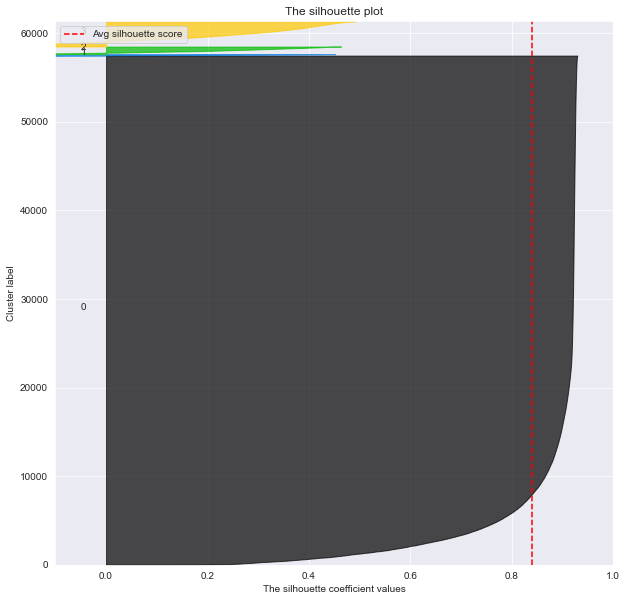

In [319]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
n_clusters = 4
plt.figure(figsize = (10,10))
plt.gca().set_xlim([-0.1,1])
plt.gca().set_ylim([0, len(data_for_clustering) + (n_clusters + 1) * 10])
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
labels = clusterer.fit_predict(data_for_clustering)
print("The average silhouette_score is :{}".format(silhouette_score(data_for_clustering, labels)))
silhouette_avg = silhouette_score(data, labels)
sample_silhouette_values = silhouette_samples(data_for_clustering, labels)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = \
    sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.gca().fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    plt.gca().text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.gca().axvline(x=silhouette_score(data_for_clustering, labels), color="red", linestyle="--", label = "Avg silhouette score")
plt.title("The silhouette plot")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.legend()
plt.show()


In [416]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')


In [417]:
fit_data_transformed=pca.fit_transform(data_for_clustering)

In [418]:
principalDf = pd.DataFrame(data = fit_data_transformed
             , columns = ['principal component 1', 'principal component 2'])

In [419]:
principalDf['labels']=kmeans.labels_

In [420]:
principalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61304 entries, 0 to 61303
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  61304 non-null  float64
 1   principal component 2  61304 non-null  float64
 2   labels                 61304 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 1.2 MB


In [421]:
principalDf['carrier_name']=data.carrier_name

In [426]:
principalDf['late_aircraft_delay_in_min']=data.late_aircraft_delay_in_min

In [427]:
principalDf

principal component 1  principal component 2  labels  \
0               -1595.563852             115.911990       0   
1               -1449.667529             325.635510       0   
2                 392.852618              16.664929       0   
3                -930.403777             -81.202365       0   
4               -1462.274816             102.649049       0   
...                      ...                    ...     ...   
61299           -1158.434316            -106.924911       0   
61300           -1340.957952              13.818544       0   
61301            2979.270393             -26.549573       0   
61302           -1832.983604              92.109923       0   
61303           -1660.066063             146.959045       0   

                 carrier_name  late_aircraft_related_delay_count  \
0                   Envoy Air                                6.0   
1                   Envoy Air                                5.0   
2                   Envoy Air                               34.0   
3                   Envoy Air                                9.0   
4                   Envoy Air                                5.0   
...                       ...                                ...   
61299  American Airlines Inc.                               13.0   
61300  American Airlines Inc.                                3.0   
61301  American Airlines Inc.                               29.0   
61302  American Airlines Inc.                               18.0   
61303  American Airlines Inc.                                5.0   

       late_aircraft_delay_in_min  
0                           263.0  
1                           291.0  
2                          2054.0  
3                           972.0  
4                           296.0  
...                           ...  
61299                       702.0  
61300                       305.0  
61301                      1829.0  
61302                      1446.0  
61303                       266.0  

[61304 rows x 6 columns]

In [428]:
principalDf.to_excel('plot_cluster6.xlsx')

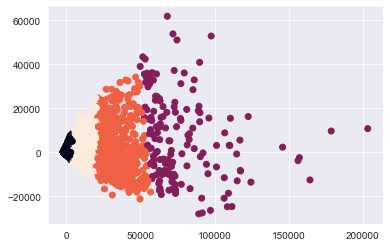

In [429]:
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=principalDf['labels'])